Dataset Importing and Querying

In [ ]:
import warnings
import itertools
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import random
import sqlite3
from itertools import cycle, islice
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
#import catboost as cb
import lightgbm as lgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
# Import timedelta from datetime library
from datetime import timedelta


ss = StandardScaler()

In [ ]:
walmart = pd.read_csv('train.csv')

walmart_feature = pd.read_csv('features.csv')

walmart_store = pd.read_csv('stores.csv')

In [ ]:
walmart.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [ ]:
walmart.shape

(421570, 5)

Group by Store

In [ ]:
walmart_store_group=walmart.groupby(["Store","Date"])[["Weekly_Sales"]].sum()
walmart_store_group.reset_index(inplace=True)

In [ ]:
result = pd.merge(walmart_store_group, walmart_store, how='inner', on='Store', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

data = pd.merge(result, walmart_feature, how='inner', on=['Store','Date'], left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

In [ ]:
print(data.shape)

(6435, 15)


DATA CLEANING

In [ ]:
data

Store        Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0         1  2010-02-05    1643690.90    A  151315        42.31       2.572   
1         1  2010-02-12    1641957.44    A  151315        38.51       2.548   
2         1  2010-02-19    1611968.17    A  151315        39.93       2.514   
3         1  2010-02-26    1409727.59    A  151315        46.63       2.561   
4         1  2010-03-05    1554806.68    A  151315        46.50       2.625   
...     ...         ...           ...  ...     ...          ...         ...   
6430     45  2012-09-28     713173.95    B  118221        64.88       3.997   
6431     45  2012-10-05     733455.07    B  118221        64.89       3.985   
6432     45  2012-10-12     734464.36    B  118221        54.47       4.000   
6433     45  2012-10-19     718125.53    B  118221        56.47       3.969   
6434     45  2012-10-26     760281.43    B  118221        58.85       3.882   

      MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0           NaN        NaN        NaN        NaN        NaN  211.096358   
1           NaN        NaN        NaN        NaN        NaN  211.242170   
2           NaN        NaN        NaN        NaN        NaN  211.289143   
3           NaN        NaN        NaN        NaN        NaN  211.319643   
4           NaN        NaN        NaN        NaN        NaN  211.350143   
...         ...        ...        ...        ...        ...         ...   
6430    4556.61      20.64       1.50    1601.01    3288.25  192.013558   
6431    5046.74        NaN      18.82    2253.43    2340.01  192.170412   
6432    1956.28        NaN       7.89     599.32    3990.54  192.327265   
6433    2004.02        NaN       3.18     437.73    1537.49  192.330854   
6434    4018.91      58.08     100.00     211.94     858.33  192.308899   

      Unemployment  IsHoliday  
0            8.106      False  
1            8.106       True  
2            8.106      False  
3            8.106      False  
4            8.106      False  
...            ...        ...  
6430         8.684      False  
6431         8.667      False  
6432         8.667      False  
6433         8.667      False  
6434         8.667      False  

[6435 rows x 15 columns]

In [ ]:
data.head()

Store        Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1  2010-02-05    1643690.90    A  151315        42.31       2.572   
1      1  2010-02-12    1641957.44    A  151315        38.51       2.548   
2      1  2010-02-19    1611968.17    A  151315        39.93       2.514   
3      1  2010-02-26    1409727.59    A  151315        46.63       2.561   
4      1  2010-03-05    1554806.68    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday  
0         8.106      False  
1         8.106       True  
2         8.106      False  
3         8.106      False  
4         8.106      False

In [ ]:
#let's encode the categorical column : IsHoliday

data['IsHoliday'] = data['IsHoliday'].apply(lambda x: 1 if x == True else 0)
# Will convert the bool to 1 and 0 for easier use later.
#data.IsHoliday=data.IsHoliday.map(lambda x: 1 if x==True else 0)

In [ ]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday         int64
dtype: object

In [ ]:
# yes my assumption was correct python have something to do with date format.
# Now converting "Date"  to date time
data["Date"]=pd.to_datetime(data.Date)

# Extracting details from date given. so that can be used for seasonal checks or grouping

data["Day"]=data.Date.dt.day
data["Month"]=data.Date.dt.month
data["Year"]=data.Date.dt.year

# Changing the Months value from numbers to real values like Jan, Feb to Dec
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Lets look into the null values
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Type               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Day                0
Month              0
Year               0
dtype: int64

In [ ]:
data.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Size          6435.0  1.302876e+05   63117.022465   34875.000   70713.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
MarkDown1     2280.0  6.855587e+03    8183.310015       0.270    1679.190   
MarkDown2     1637.0  3.218966e+03    9268.082387    -265.760      37.200   
MarkDown3     2046.0  1.349853e+03    9287.242800     -29.100       4.700   
MarkDown4     1965.0  3.303858e+03    6211.203947       0.220     483.270   
MarkDown5     2295.0  4.435262e+03    5868.933325     135.160    1702.565   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   
IsHoliday     6435.0  6.993007e-02       0.255049       0.000       0.000   
Day           6435.0  1.567832e+01       8.755780       1.000       8.000   
Year          6435.0  2.010965e+03       0.797019    2010.000    2010.000   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Size          126512.000000  2.023070e+05  2.196220e+05  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
MarkDown1       4972.590000  8.873583e+03  8.864676e+04  
MarkDown2        187.040000  1.785290e+03  1.045195e+05  
MarkDown3         22.700000  9.998750e+01  1.416306e+05  
MarkDown4       1419.420000  3.496080e+03  6.747485e+04  
MarkDown5       3186.520000  5.422080e+03  1.085193e+05  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01  
IsHoliday          0.000000  0.000000e+00  1.000000e+00  
Day               16.000000  2.300000e+01  3.100000e+01  
Year            2011.000000  2.012000e+03  2.012000e+03

In [ ]:
#add a 'week' column to the dataset for further analysis
data['Week'] = data.Date.dt.isocalendar().week

EDA

In [ ]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')


In [ ]:
df_weeks = data.groupby('Week').sum()

import plotly.express as px
fig = px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')
fig.update_traces(line_color='deeppink', line_width=3)

In [ ]:
df_weeks.head()

Store  Weekly_Sales      Size  Temperature  Fuel_Price   MarkDown1  \
Week                                                                       
1      2070  8.773121e+07  11725884      3438.27     287.489   214551.50   
2      2070  8.269676e+07  11725884      3167.09     291.404   148560.51   
3      2070  8.273564e+07  11725884      3476.88     293.341   104001.81   
4      2070  7.943483e+07  11725884      3455.57     294.581    63331.86   
5      3105  1.419895e+08  17588826      4919.52     418.696  1624211.71   

      MarkDown2  MarkDown3   MarkDown4  MarkDown5           CPI  Unemployment  \
Week                                                                            
1     956964.10    5105.11    44069.57  223036.75  15421.135275       710.979   
2     420168.49    3172.06    22332.89  165721.27  15430.151991       710.979   
3     141268.63    3098.39    27717.05  122143.56  15443.190027       710.979   
4      74200.84    3089.75     4254.13  116290.60  15456.228061       710.979   
5     126542.47    6408.63  1286593.08  267767.25  23017.155918      1098.848   

      IsHoliday   Day    Year  
Week                           
1             0   585  181035  
2             0  1215  181035  
3             0  1845  181035  
4             0  2475  181035  
5             0   540  271485

In [ ]:
import plotly.graph_objs as go
from plotly import tools

fig = go.Figure()

#fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown2'], name = 'MarkDown2', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown5'], name = 'MarkDown5', mode = 'lines') )

fig.update_layout(title = 'Sales vs Markdown', xaxis_title = 'Weeks')


In [ ]:
## setting all missing values in markdown columns to -500 for now. We will treat them later while performing Feature scaling
data['MarkDown1'].fillna(-500, inplace=True)
data['MarkDown2'].fillna(-500, inplace=True)
data['MarkDown3'].fillna(-500, inplace=True)
data['MarkDown4'].fillna(-500, inplace=True)
data['MarkDown5'].fillna(-500, inplace=True)

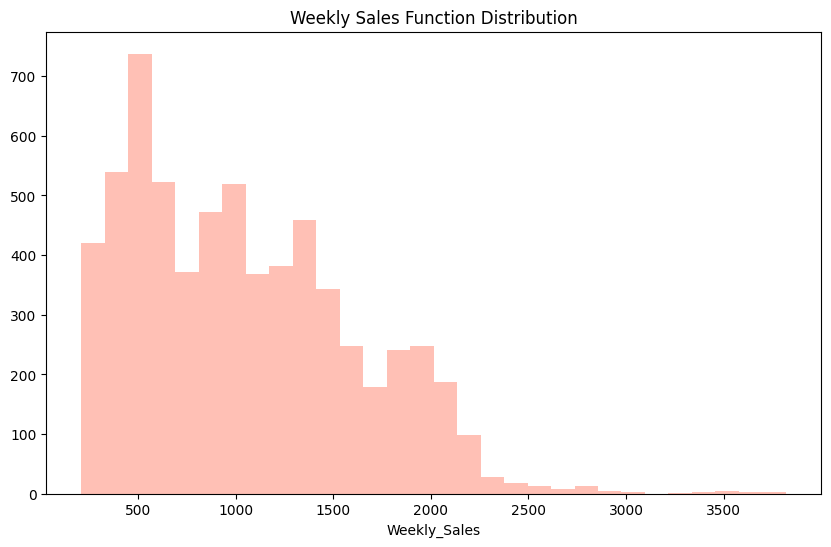

In [ ]:
# From the Describe function we see that weekly sales for each store are very high.
# we will scale down the value for ease of use and revert back when we look residuals or where necessary

plt.figure(figsize=(10, 6))
data["Weekly_Sales"]=data.Weekly_Sales/1000

sns.distplot(data.Weekly_Sales, kde=False, bins=30, color = 'tomato')
plt.title('Weekly Sales Function Distribution')
plt.show()

In [ ]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

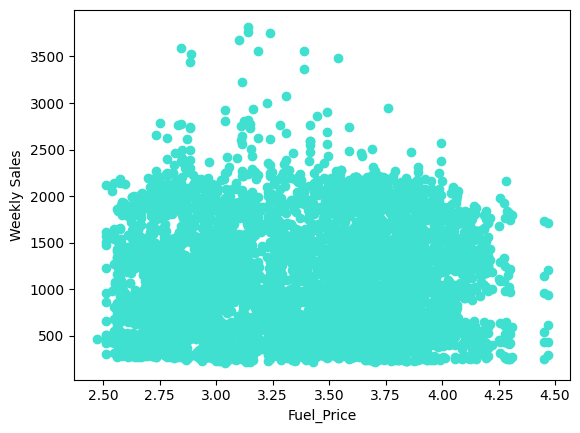

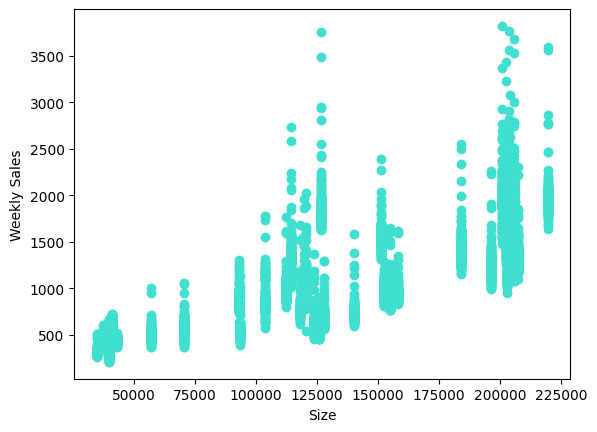

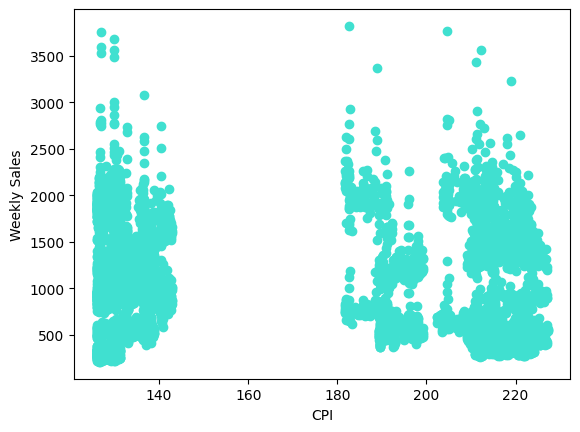

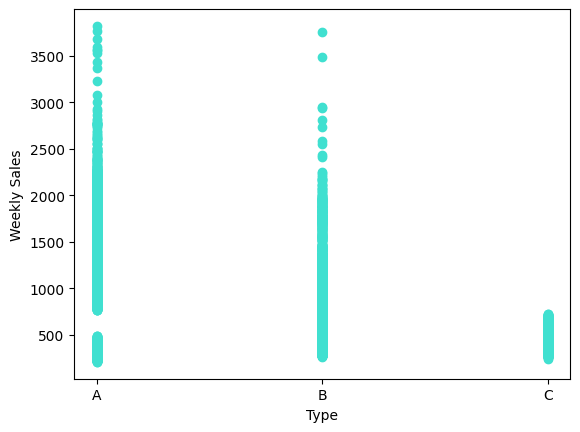

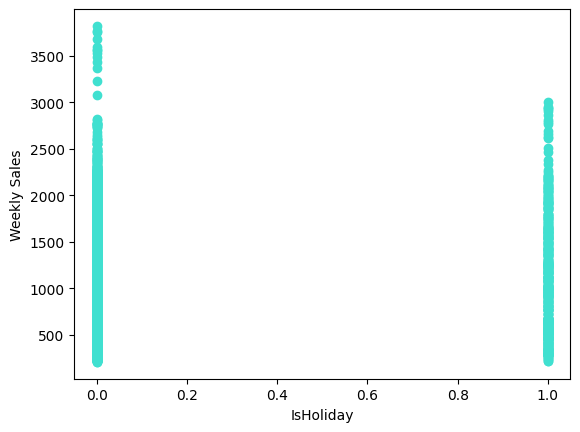

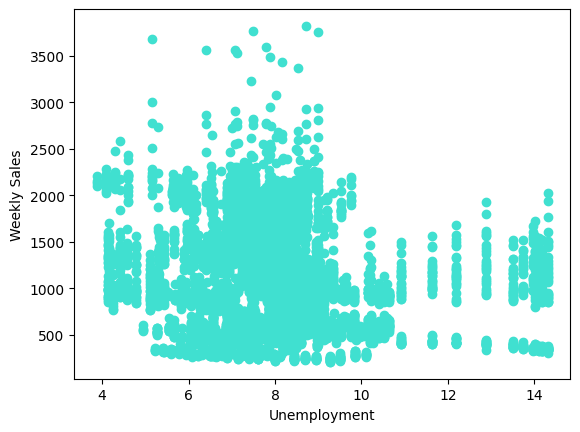

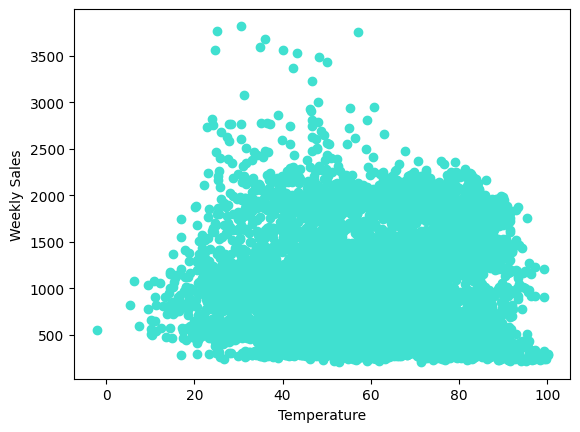

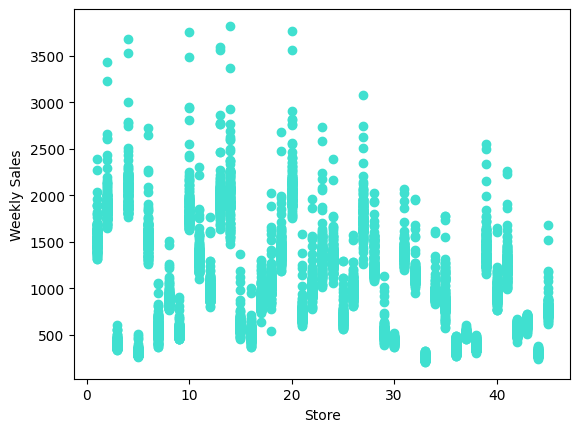

In [ ]:
scatter(data, 'Fuel_Price')
scatter(data, 'Size')
scatter(data, 'CPI')
scatter(data, 'Type')
scatter(data, 'IsHoliday')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')

In [ ]:
data['Week'] = data.Date.dt.isocalendar().week

In [ ]:
data.head()

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1 2010-02-05    1643.69090    A  151315        42.31       2.572   
1      1 2010-02-12    1641.95744    A  151315        38.51       2.548   
2      1 2010-02-19    1611.96817    A  151315        39.93       2.514   
3      1 2010-02-26    1409.72759    A  151315        46.63       2.561   
4      1 2010-03-05    1554.80668    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0     -500.0     -500.0     -500.0     -500.0     -500.0  211.096358   
1     -500.0     -500.0     -500.0     -500.0     -500.0  211.242170   
2     -500.0     -500.0     -500.0     -500.0     -500.0  211.289143   
3     -500.0     -500.0     -500.0     -500.0     -500.0  211.319643   
4     -500.0     -500.0     -500.0     -500.0     -500.0  211.350143   

   Unemployment  IsHoliday  Day Month  Year  Week  
0         8.106          0    5   Feb  2010     5  
1         8.106          1   12   Feb  2010     6  
2         8.106          0   19   Feb  2010     7  
3         8.106          0   26   Feb  2010     8  
4         8.106          0    5   Mar  2010     9

In [ ]:
weekly_sales_2010 = data[data.Year==2010]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2011 = data[data.Year==2011]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2012 = data[data.Year==2012]['Weekly_Sales'].groupby(data['Week']).mean()

In [ ]:
weekly_sales_2010.head()

Week
5    1105.572011
6    1074.148392
7    1072.822084
8     977.079358
9    1041.588229
Name: Weekly_Sales, dtype: float64

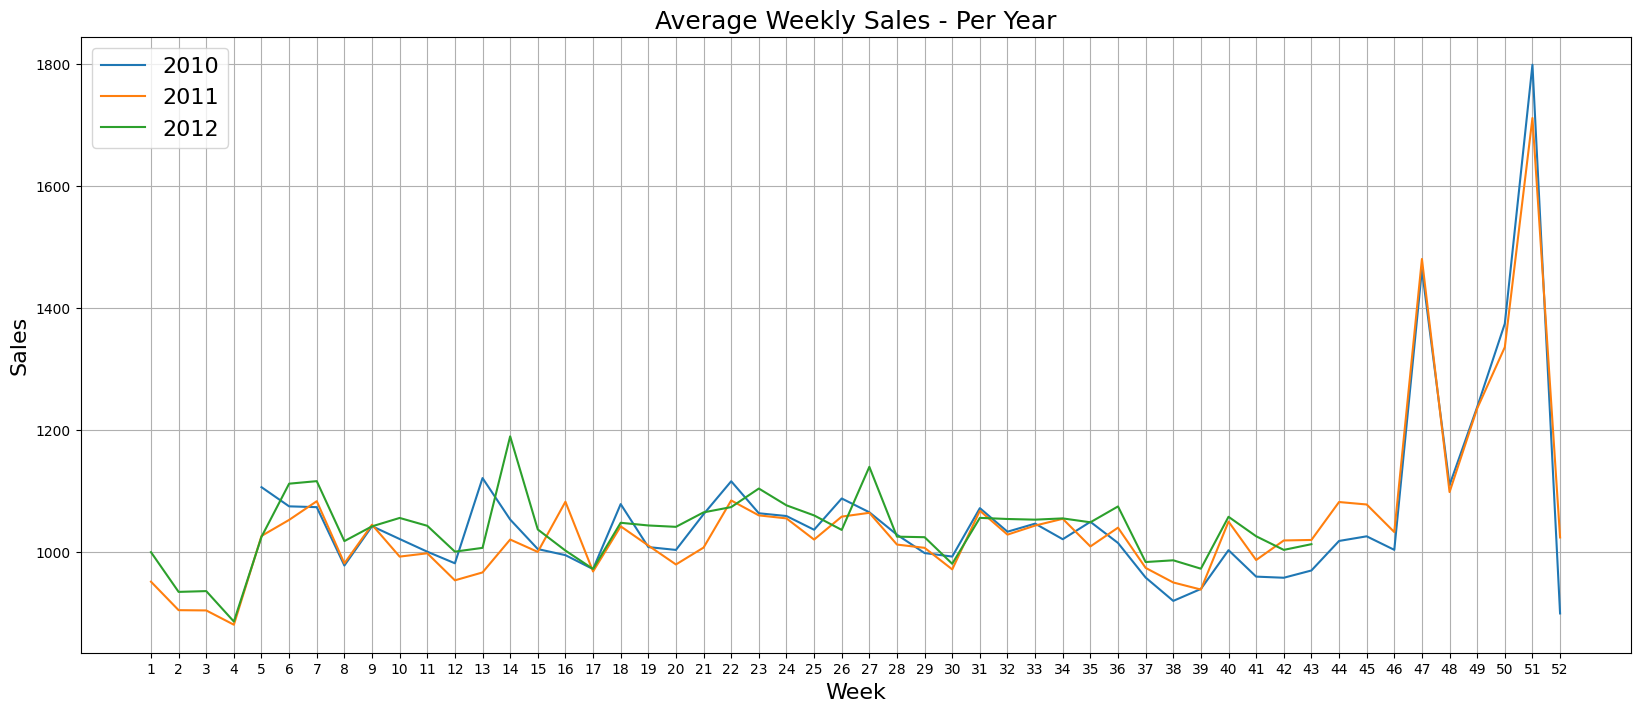

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)

plt.show()


Note :
As we can see, there is one important Holiday not included in 'IsHoliday'. It's the Easter Day. It is always in a Sunday, but can fall on different weeks.

In 2010 is in Week 13

In 2011, Week 16

Week 14 in 2012

Week 13 in 2013 for Test set

So, we can change to 'True' these Weeks in each Year.

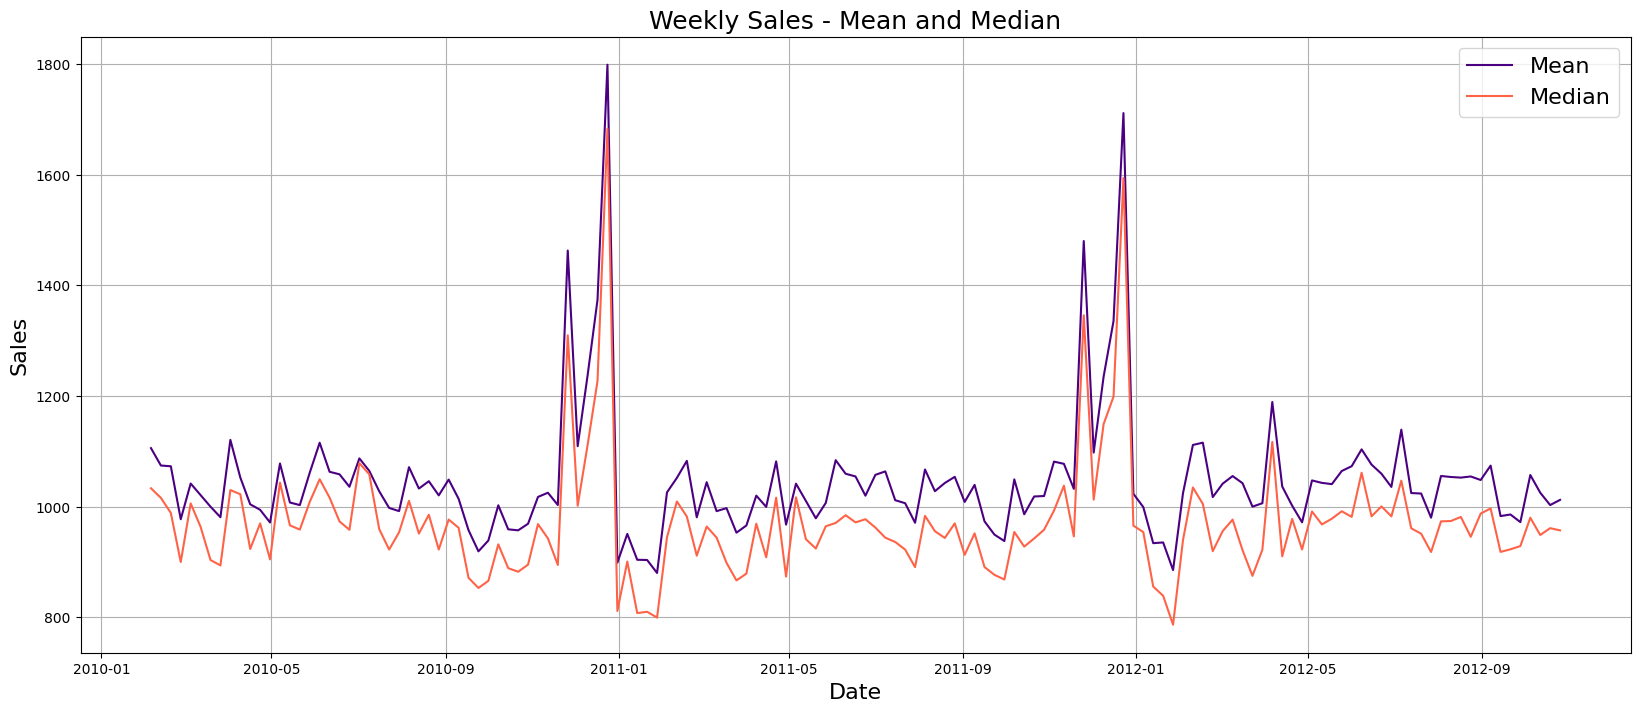

In [ ]:
weekly_sales_mean = data['Weekly_Sales'].groupby(data['Date']).mean()
weekly_sales_median = data['Weekly_Sales'].groupby(data['Date']).median()
plt.figure(figsize=(20,8))
plt.plot(weekly_sales_mean.index, weekly_sales_mean.values, color = 'indigo')
plt.plot(weekly_sales_median.index, weekly_sales_median.values, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

Checking the relationship of the other features with weekly sales

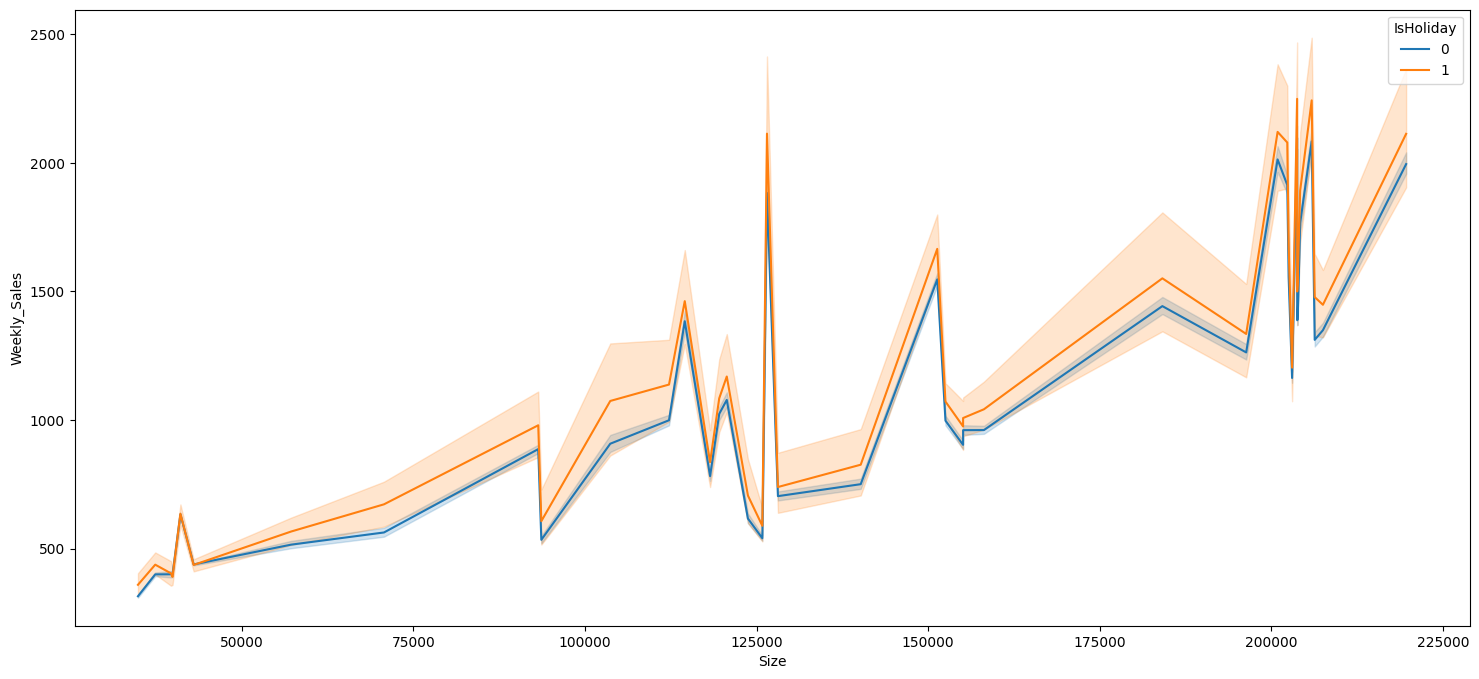

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot ( data = data, x = 'Size', y =  'Weekly_Sales', hue = 'IsHoliday');

In [ ]:
px.histogram(data, x='Temperature', y ='Weekly_Sales', color='IsHoliday', marginal='box')

In [ ]:
px.histogram(data, x='Fuel_Price', y ='Weekly_Sales', color='IsHoliday', marginal='box')

In [ ]:
px.histogram(data, x='CPI', y ='Weekly_Sales', color='IsHoliday')

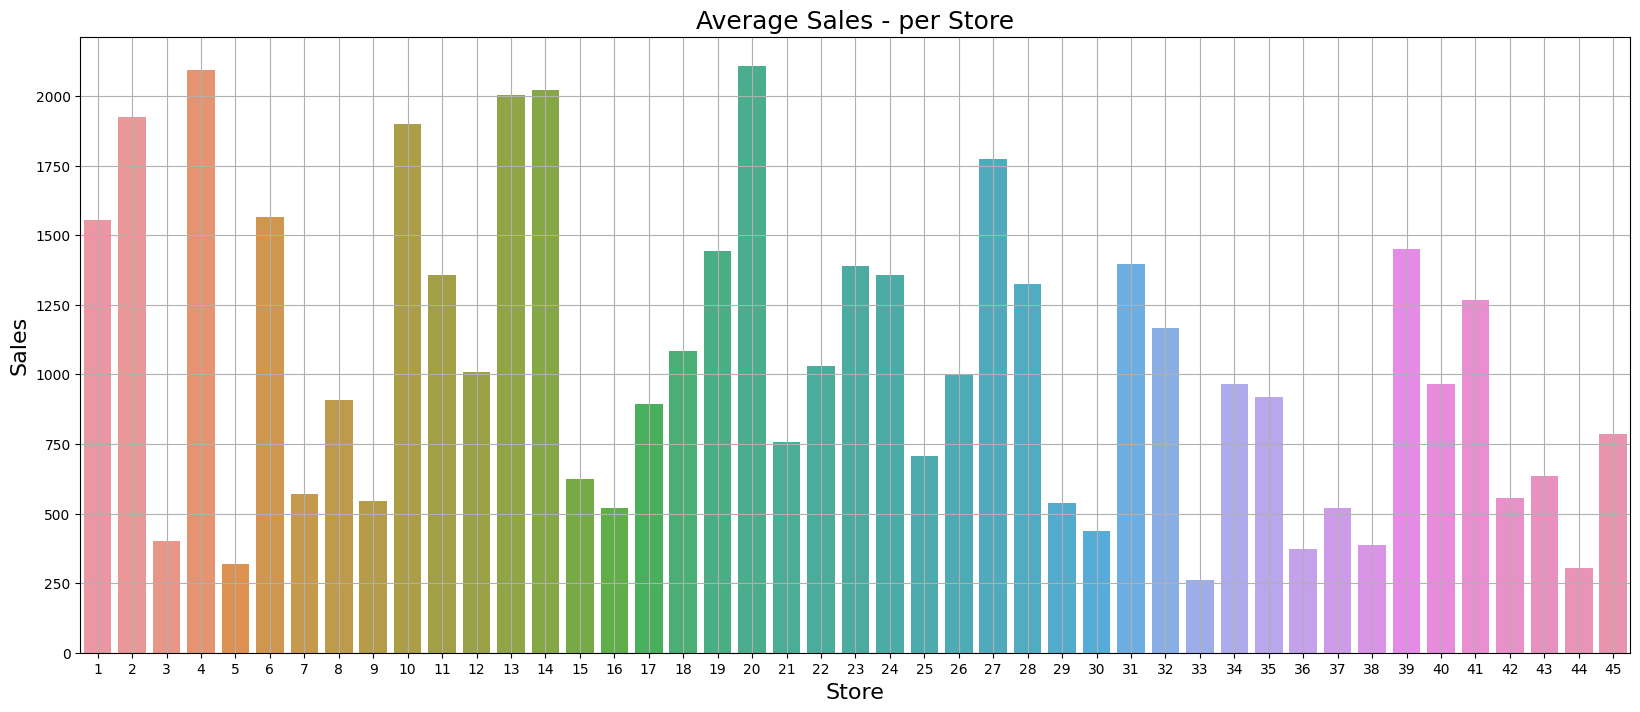

In [ ]:
weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

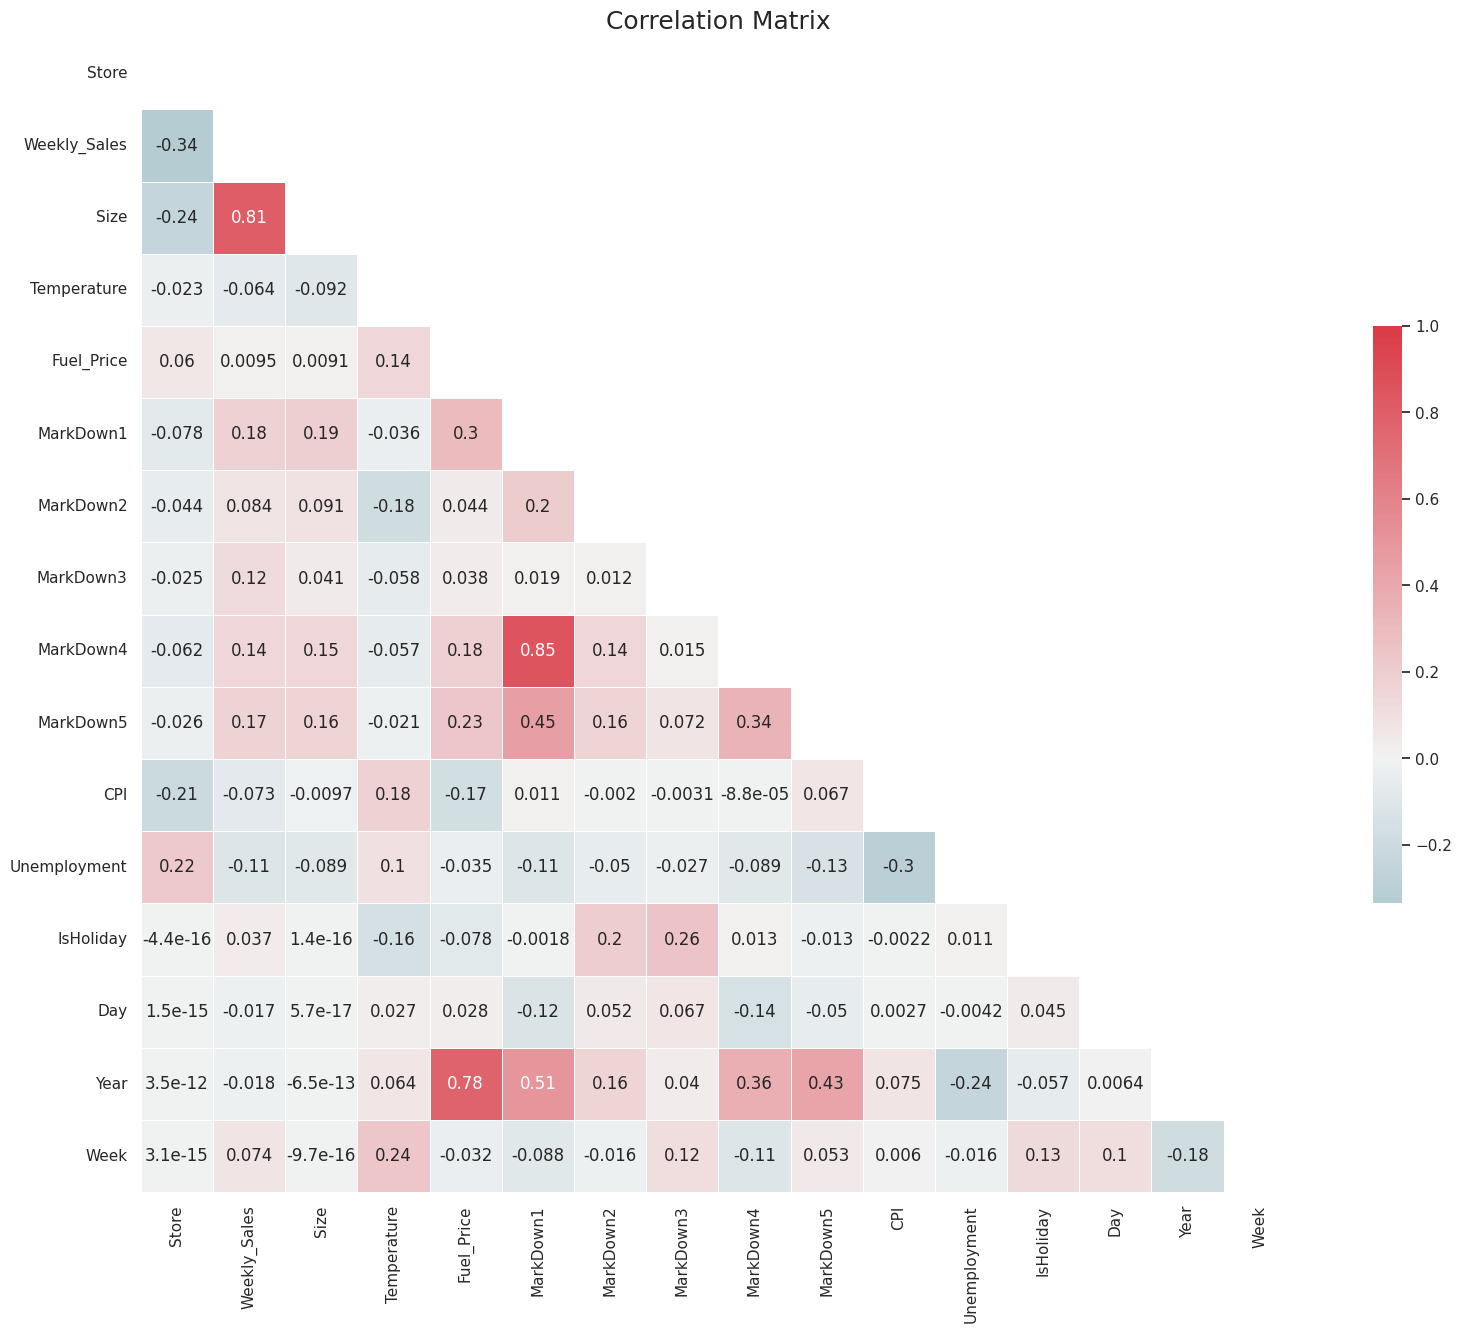

In [ ]:
sns.set(style="white")

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Detailed Time-Series Analysis

store 4

In [ ]:
data1 = pd.read_csv('train.csv')
data1.set_index('Date', inplace=True)

store4 = data1[data1.Store == 4]
# there are about 45 different stores in this dataset.

sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.dtypes
sales4.head(20)
# Grouped weekly sales by store 4

#remove date from index to change its dtype because it clearly isnt acceptable.
sales4.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'])
# resetting date back to the index
sales4.set_index('Date',inplace = True)

store 6

In [ ]:
# Lets take store 6 data for analysis
store6 = data1[data1.Store == 6]
# there are about 45 different stores in this dataset.

sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'])
# resetting date back to the index
sales6.set_index('Date',inplace = True)

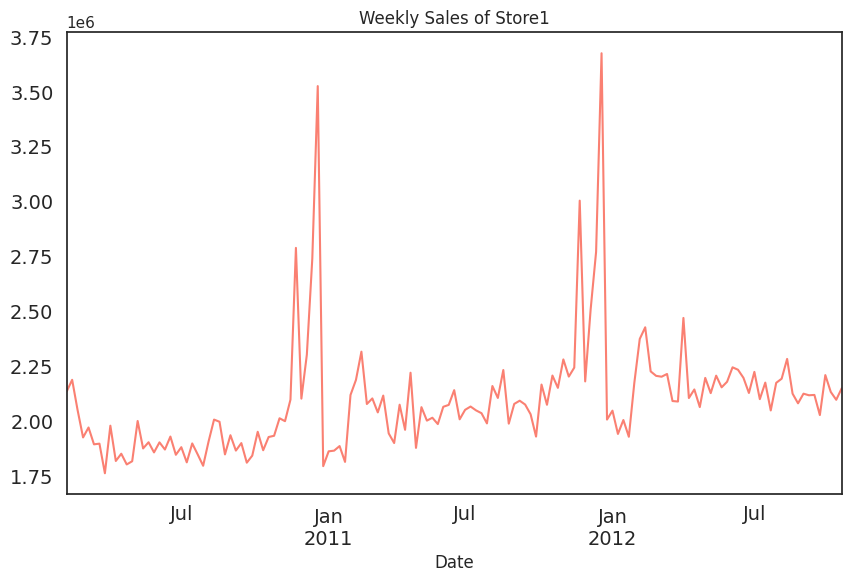

In [ ]:
sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store1', fontsize=14, color = 'salmon')
plt.show()

Time Series Components

<Figure size 640x480 with 0 Axes>

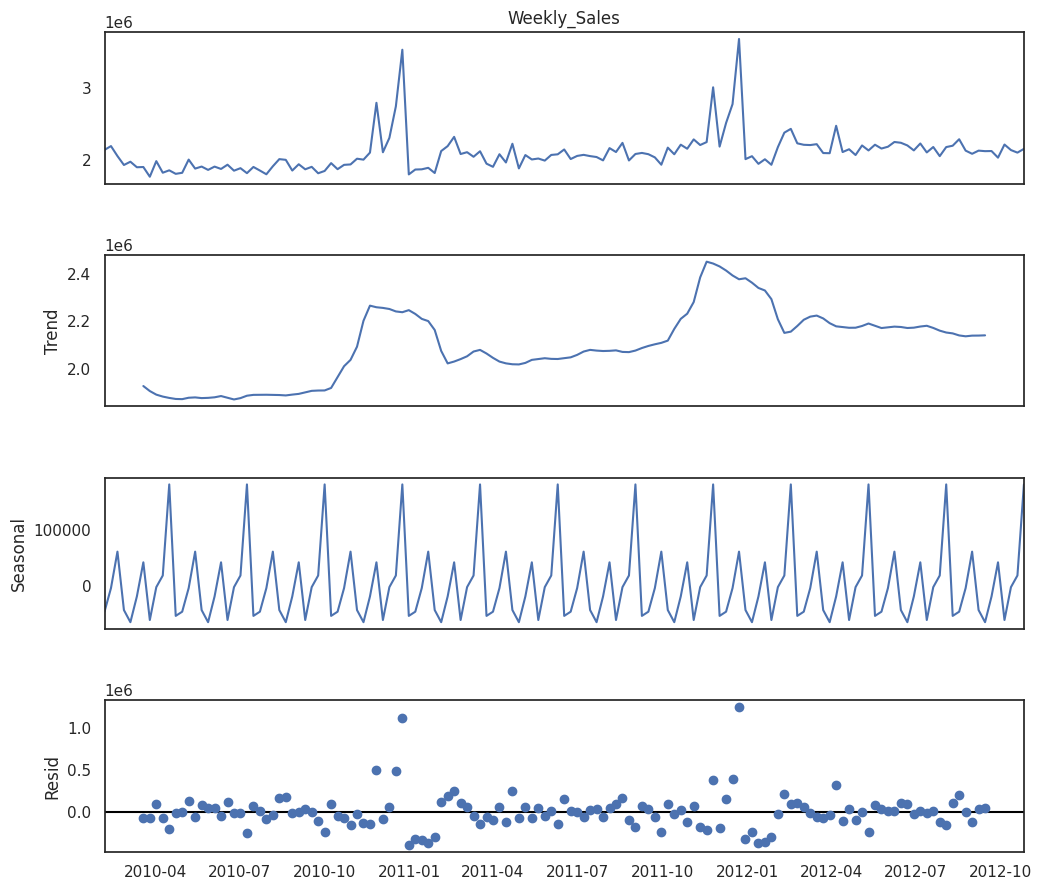

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales4.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

<Figure size 640x480 with 0 Axes>

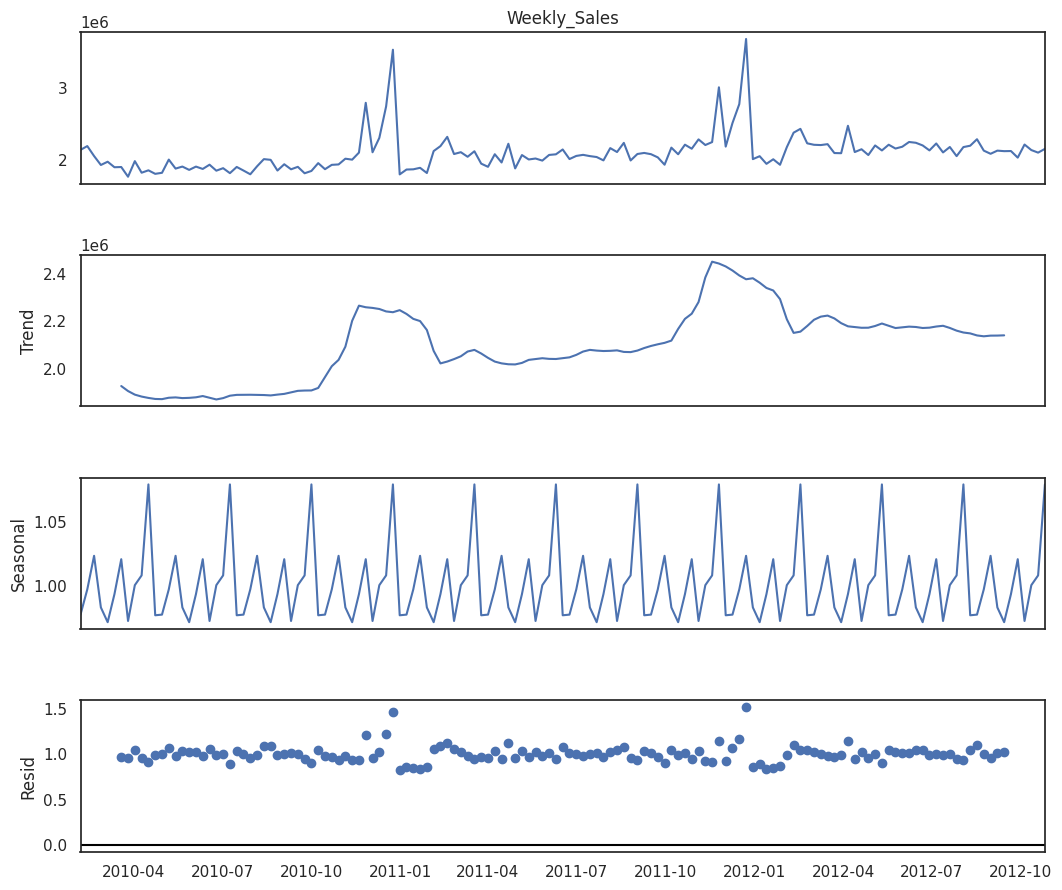

In [ ]:
decomposition = seasonal_decompose(sales4.Weekly_Sales, model= 'multiplicative', period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [ ]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

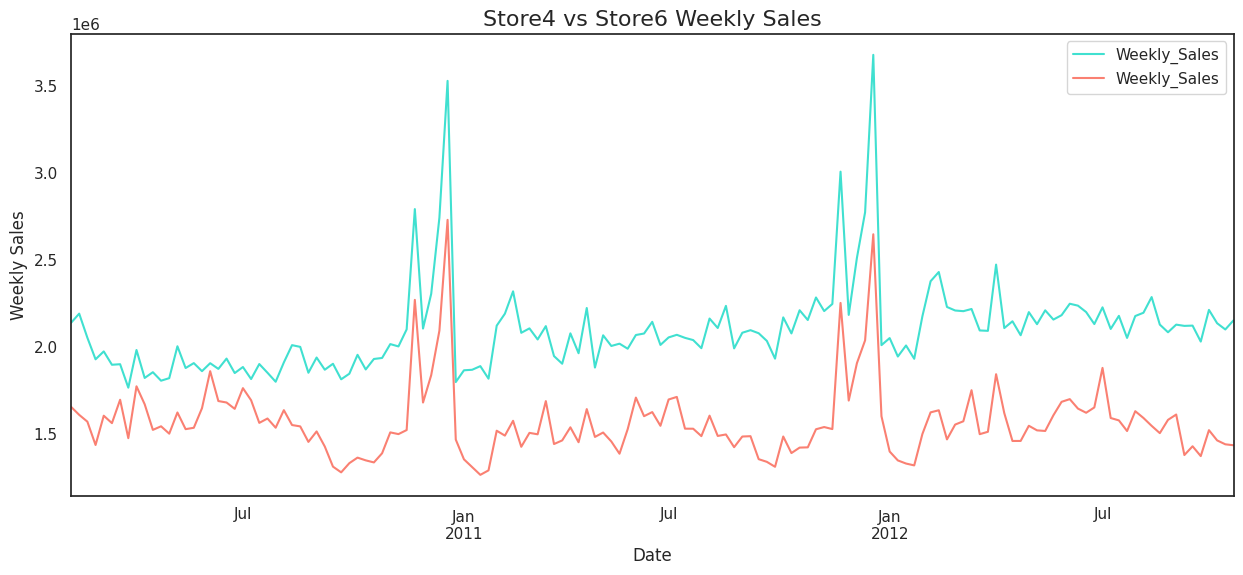

In [ ]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize = '16')
plt.show()

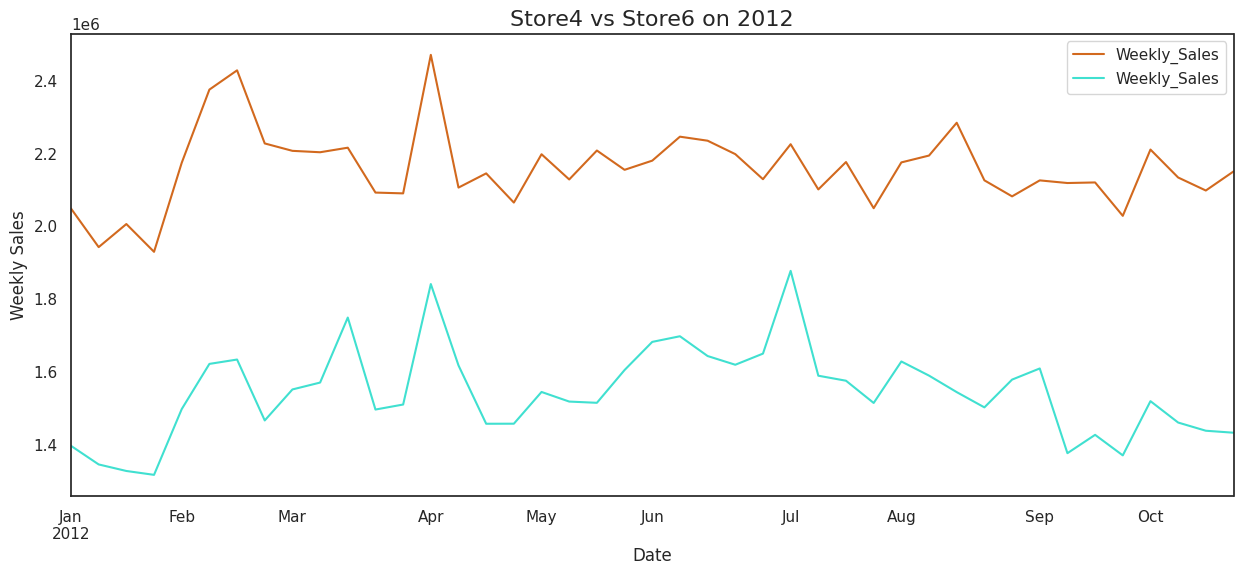

In [ ]:
# Lets Look into 2012 data for a better view
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 on 2012', fontsize = '16')
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7624      0.535     -3.295      0.001      -2.811      -0.714
ar.L2         -1.3055      0.578     -2.260      0.024      -2.438      -0.173
ar.L3         -0.6006      0.251     -2.390      0.017      -1.093      -0.108
ar.L4         -0.1900      0.090     -2.104      0.035      -0.367      -0.013
ma.L1         -1.3727      0.486     -2.827      0.005      -2.324      -0.421
ma.L2         -0.2331      1.044     -0.223      0.823      -2.279       1.813
ma.L3          0.6099      0.584      1.045      0.296      -0.534       1.754
ar.S.L52      -0.0682      0.048     -1.418      0.156      -0.163       0.026
sigma2      1.622e+10   5.35e-11   3.03e+20      0.000    1.62e+10    1.62e+10


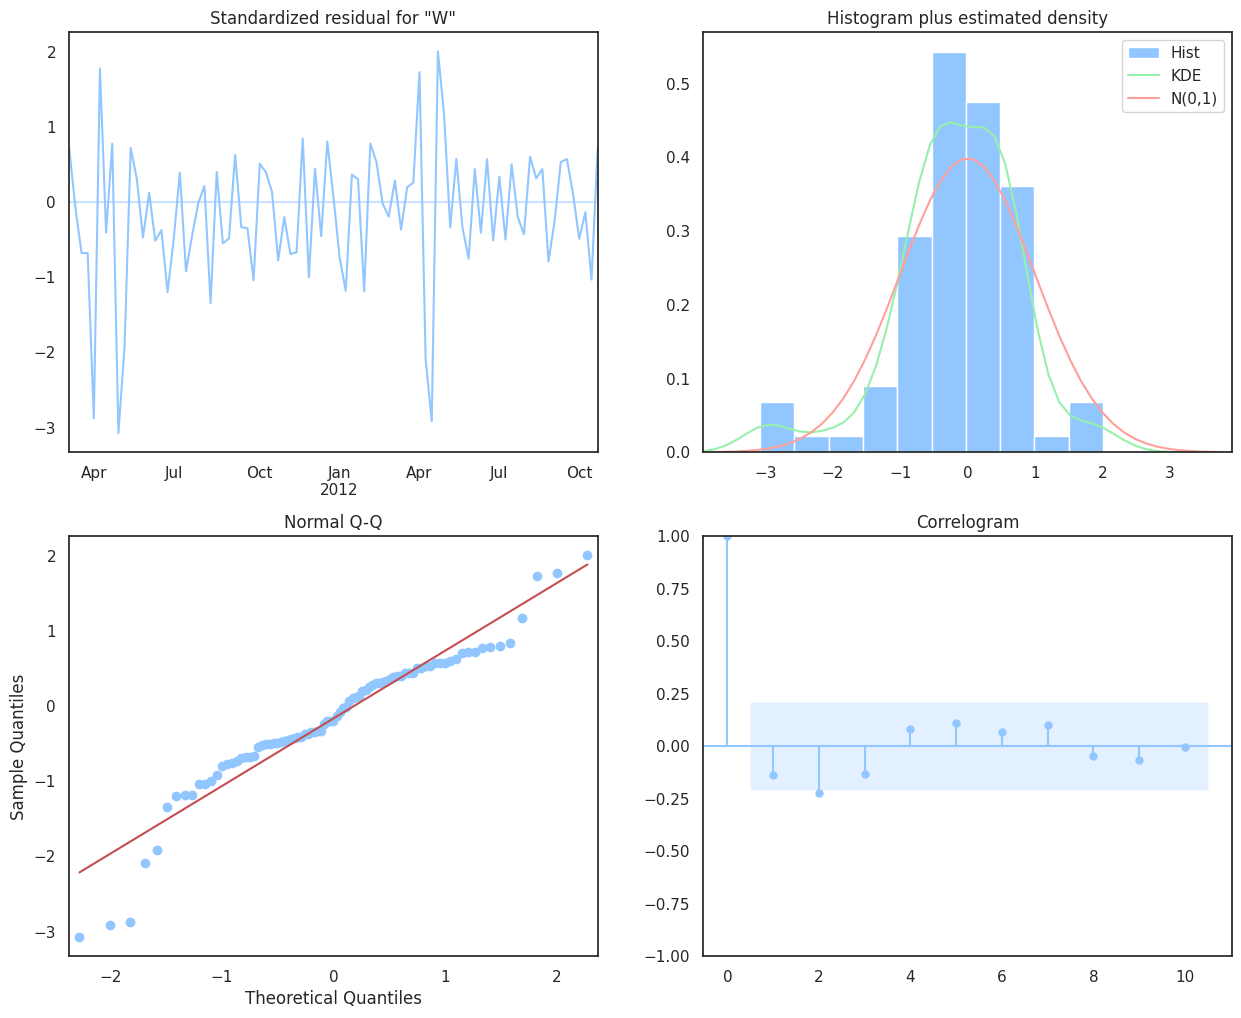

In [ ]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Will predict for last 90 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

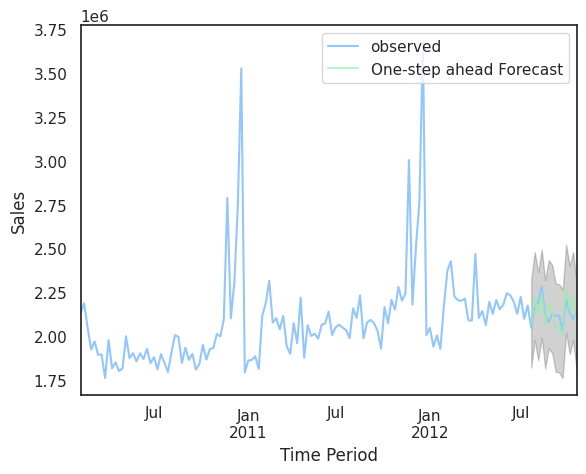

In [ ]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4720667479.51


In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

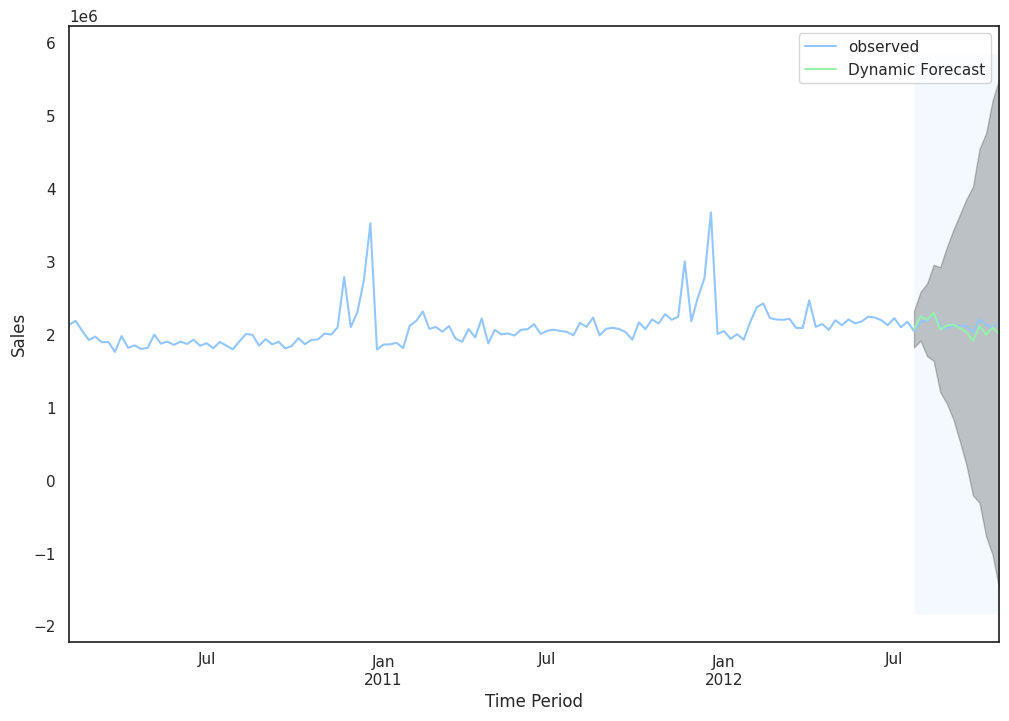

In [ ]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = y1['2012-7-27':]

# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 75448.22


In [ ]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 836795.2202102947


In [ ]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

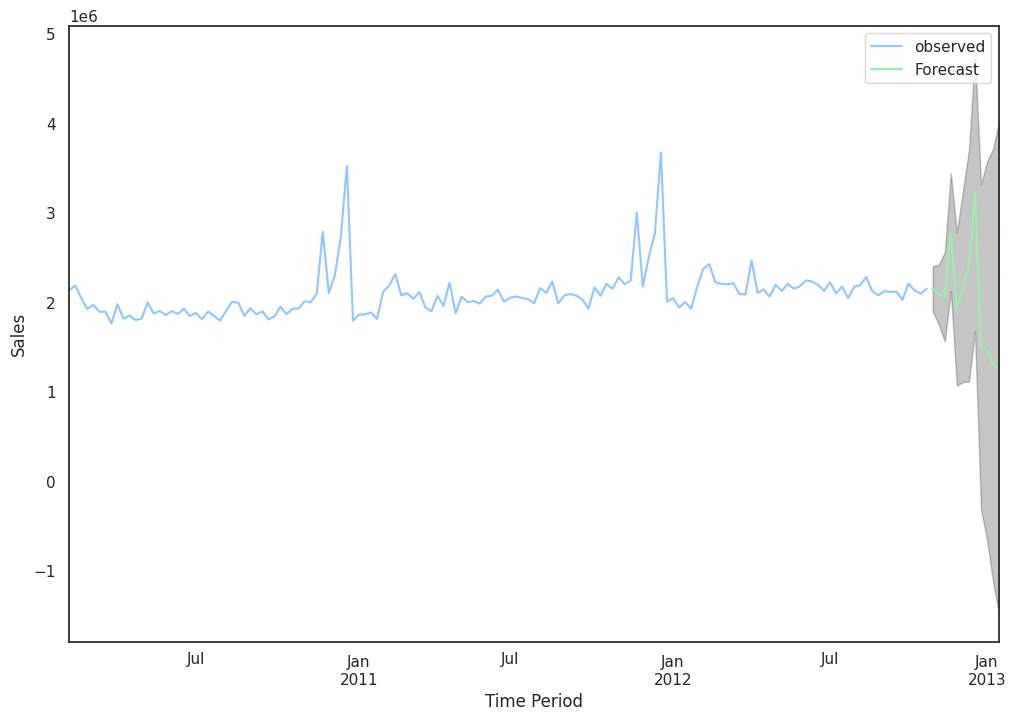

In [ ]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

Modelling & Machine learning

In [ ]:
# create dummy variables for 'Type' and keeping all columns to see heatmap then will drop 1 column
Type_dummies = pd.get_dummies(data.Type, prefix='Type')

# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
data = pd.concat([data, Type_dummies], axis=1)

# Not dropping the orginal Type column now so that I can use the field in some data analysis

In [ ]:
data

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0         1 2010-02-05    1643.69090    A  151315        42.31       2.572   
1         1 2010-02-12    1641.95744    A  151315        38.51       2.548   
2         1 2010-02-19    1611.96817    A  151315        39.93       2.514   
3         1 2010-02-26    1409.72759    A  151315        46.63       2.561   
4         1 2010-03-05    1554.80668    A  151315        46.50       2.625   
...     ...        ...           ...  ...     ...          ...         ...   
6430     45 2012-09-28     713.17395    B  118221        64.88       3.997   
6431     45 2012-10-05     733.45507    B  118221        64.89       3.985   
6432     45 2012-10-12     734.46436    B  118221        54.47       4.000   
6433     45 2012-10-19     718.12553    B  118221        56.47       3.969   
6434     45 2012-10-26     760.28143    B  118221        58.85       3.882   

      MarkDown1  MarkDown2  MarkDown3  ...         CPI  Unemployment  \
0       -500.00    -500.00    -500.00  ...  211.096358         8.106   
1       -500.00    -500.00    -500.00  ...  211.242170         8.106   
2       -500.00    -500.00    -500.00  ...  211.289143         8.106   
3       -500.00    -500.00    -500.00  ...  211.319643         8.106   
4       -500.00    -500.00    -500.00  ...  211.350143         8.106   
...         ...        ...        ...  ...         ...           ...   
6430    4556.61      20.64       1.50  ...  192.013558         8.684   
6431    5046.74    -500.00      18.82  ...  192.170412         8.667   
6432    1956.28    -500.00       7.89  ...  192.327265         8.667   
6433    2004.02    -500.00       3.18  ...  192.330854         8.667   
6434    4018.91      58.08     100.00  ...  192.308899         8.667   

      IsHoliday  Day  Month  Year Week  Type_A  Type_B  Type_C  
0             0    5    Feb  2010    5       1       0       0  
1             1   12    Feb  2010    6       1       0       0  
2             0   19    Feb  2010    7       1       0       0  
3             0   26    Feb  2010    8       1       0       0  
4             0    5    Mar  2010    9       1       0       0  
...         ...  ...    ...   ...  ...     ...     ...     ...  
6430          0   28    Sep  2012   39       0       1       0  
6431          0    5    Oct  2012   40       0       1       0  
6432          0   12    Oct  2012   41       0       1       0  
6433          0   19    Oct  2012   42       0       1       0  
6434          0   26    Oct  2012   43       0       1       0  

[6435 rows x 22 columns]

In [ ]:
#Create a dataframe for heatmap
data_heatmap_df=data.copy()

# Eliminating all the columns that are not continuous/binary  variables from the heatmap section.
#data_heatmap_df.drop(['Store','Day','Month','Year','Date','Store','Type','Type_A','Type_B','Type_C'], axis=1,inplace=True)

data_heatmap_df.drop(['Store','Day','Month','Year','Date','Store','Type','Type_A','Type_B'], axis=1,inplace=True)

# Lets look the correlation matrix and heat map of the

## Correlation Heat map
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,8))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap='Pastel1_r')

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

Statistical analysis and correlations

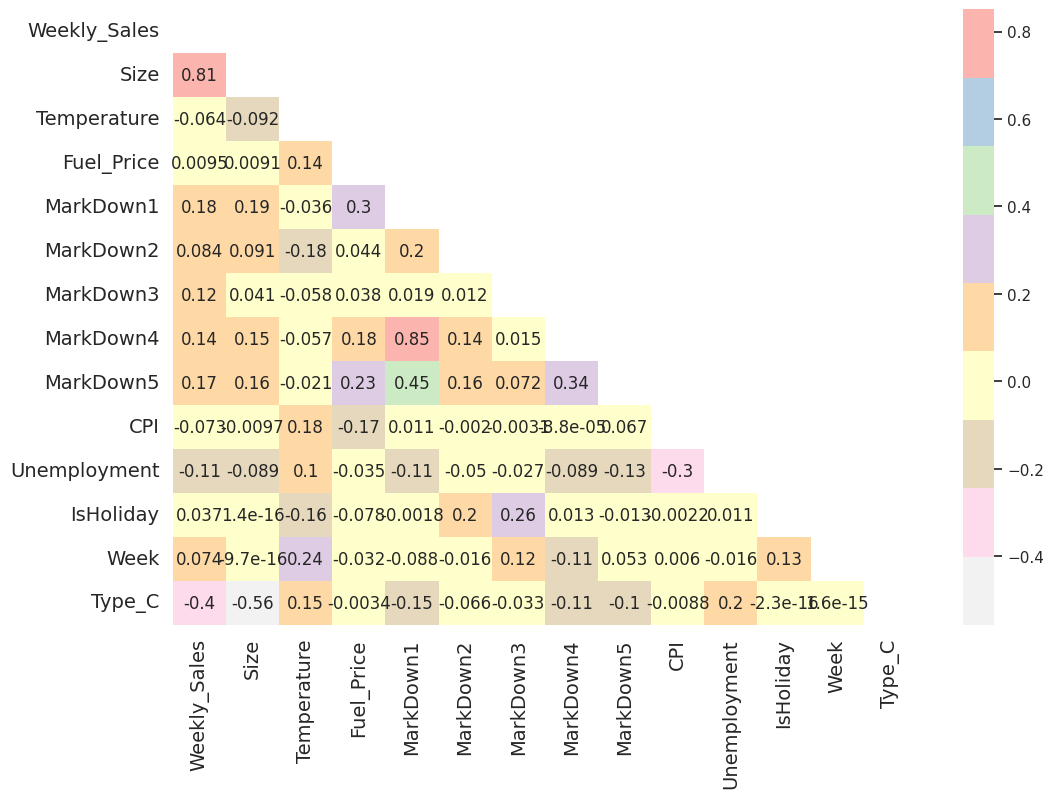

In [ ]:
correlation_heat_map(data_heatmap_df)

#inference: By checking the direct correlation of features there is no much promising correlations.
#           There are no much correlation within the features as well. In a way this is good because
#           there won't be multicollinearity that we have to take care while running models.


Plotting data

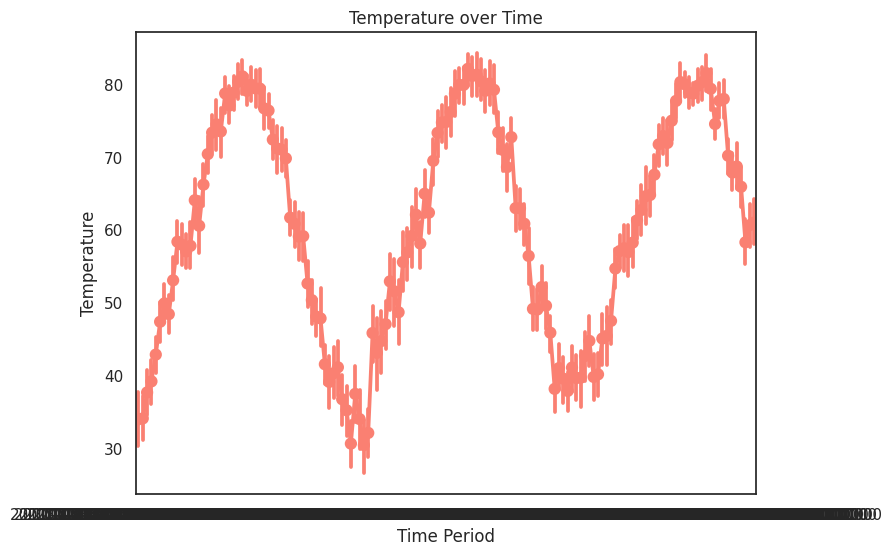

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Temperature", data=data, color = 'salmon')
plt.xlabel('Time Period')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()
# inference: Graph clearly shows Temperature is more of a seasonal and repeated in cycles and this would
# be an interesting data point that we can use for studies further


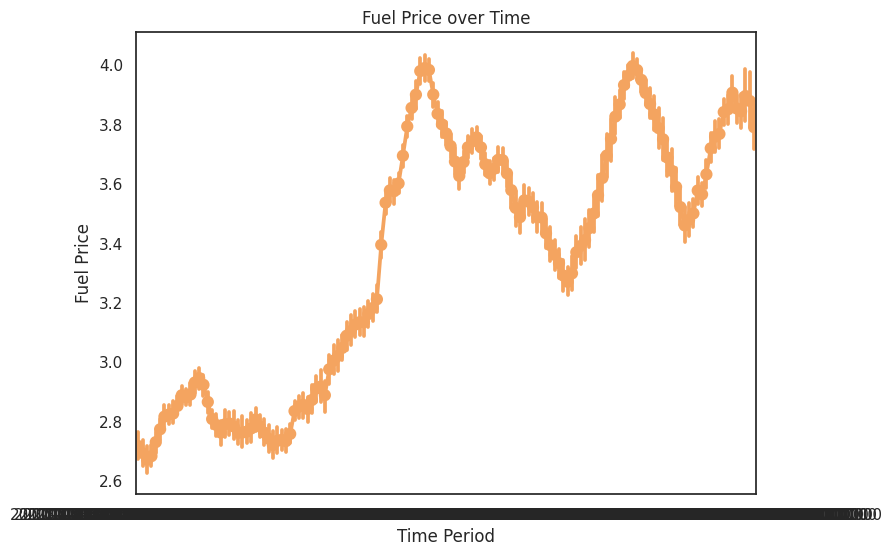

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Fuel_Price", data=data, color = 'sandybrown')
plt.xlabel('Time Period')
plt.ylabel('Fuel Price')
plt.title('Fuel Price over Time')
plt.show()
# inference: Fuel price varies over time and there are high and lows

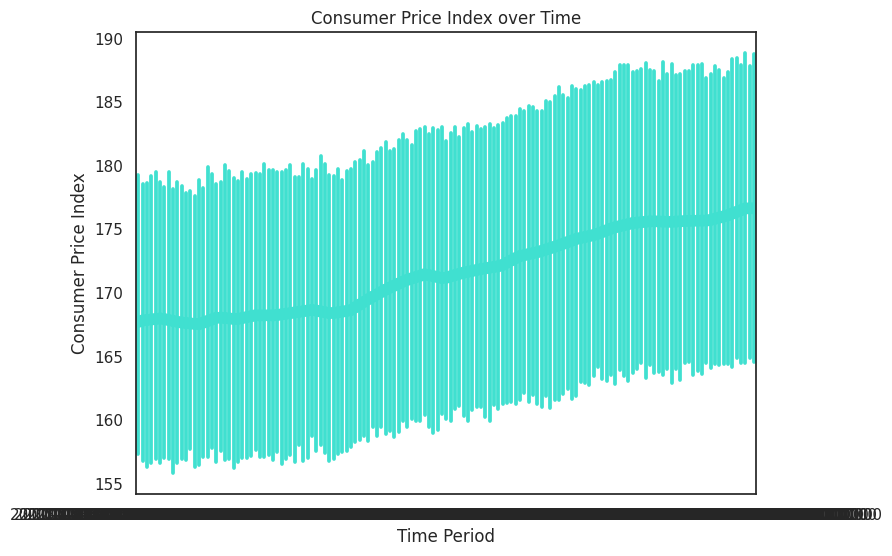

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="CPI", data=data, color = 'turquoise')
plt.xlabel('Time Period')
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index over Time')
plt.show()
# inference: over time CPI have increased. but the change is not much

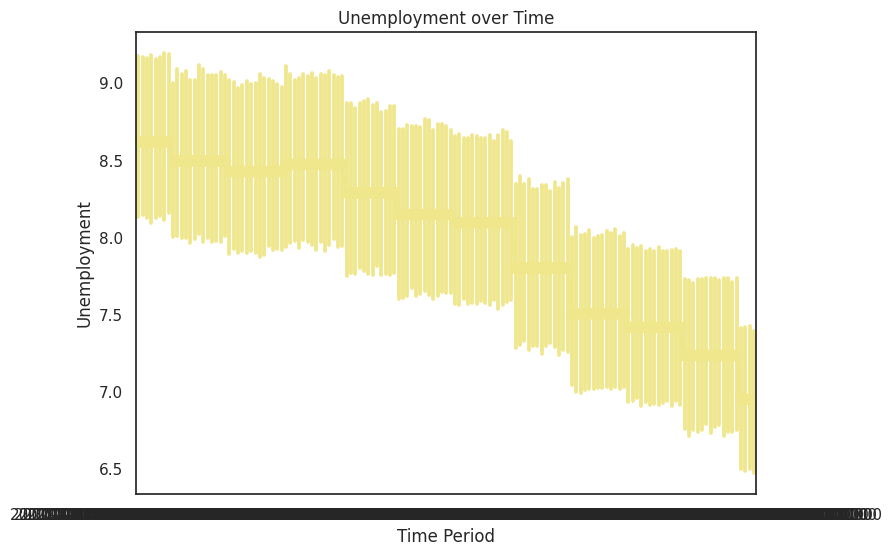

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Unemployment", data=data, color='khaki')
plt.xlabel('Time Period')
plt.ylabel('Unemployment')
plt.title('Unemployment over Time')
plt.show()
# inference:  Over time unemployment have came down we can see this factor also whether it have affected the Sales

Visual analysis

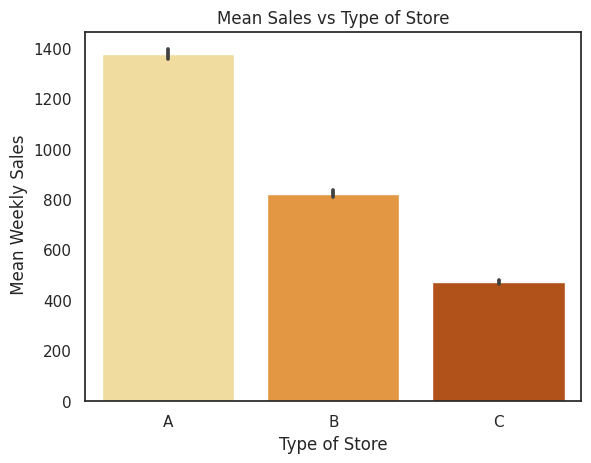

In [ ]:
# Checking how the Type of the store have effect on the sales.
col=['coral', 'greenyellow', 'turquoise']
sns.barplot(x="Type", y="Weekly_Sales", data=data,orient='v', palette ='YlOrBr')
plt.xlabel('Type of Store')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean Sales vs Type of Store')
#plt.savefig('./images/Type_vs_Sales.png')
plt.show()

# inference: From the graph its clear that Type A > Type B > Type C in mean weekly sales.

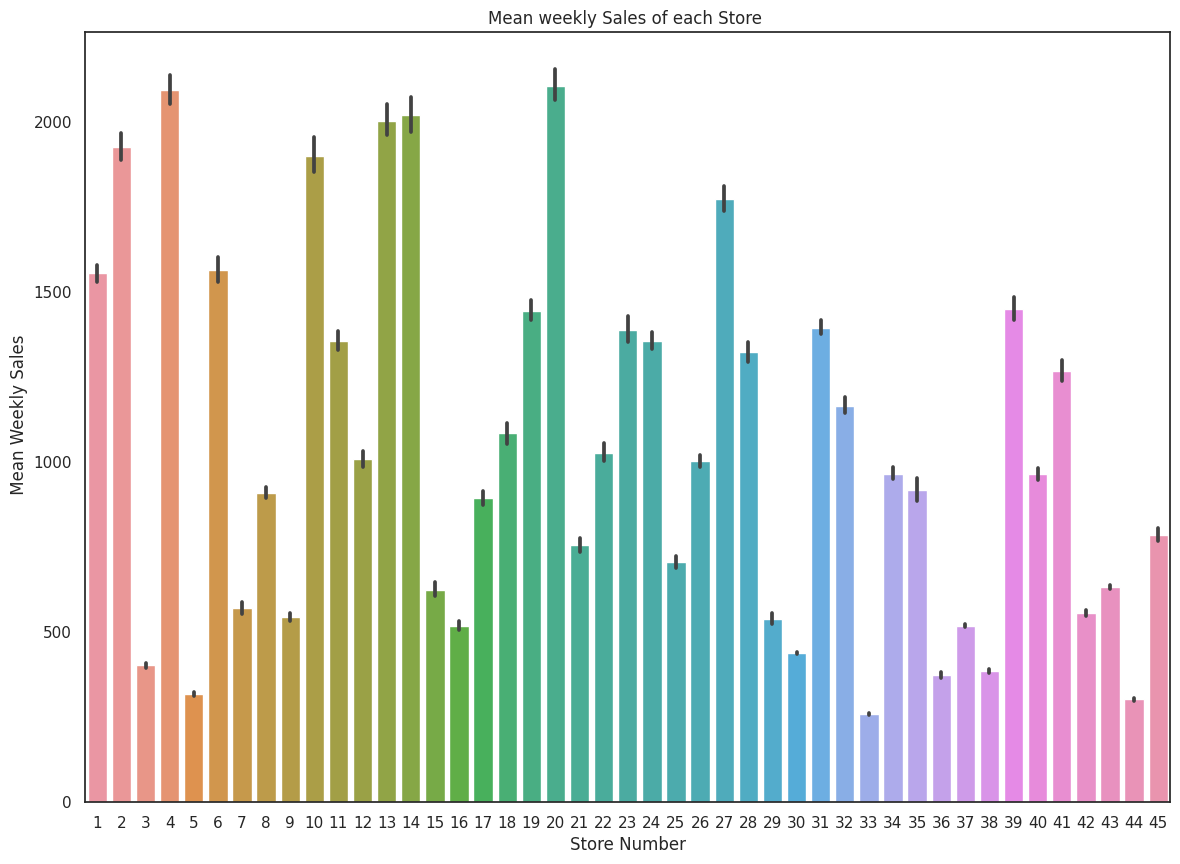

In [ ]:
plt.subplots(figsize=(14,10))
sns.barplot(x="Store", y="Weekly_Sales", data=data,orient='v')
plt.xlabel('Store Number')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean weekly Sales of each Store ')
#plt.savefig('./images/Mean_Weekly_Sales_vs_Stores.png')
plt.show()

# inference : From the chart we can see that there are stores that have a weekly sales from $250,000
#             to $2,200,000

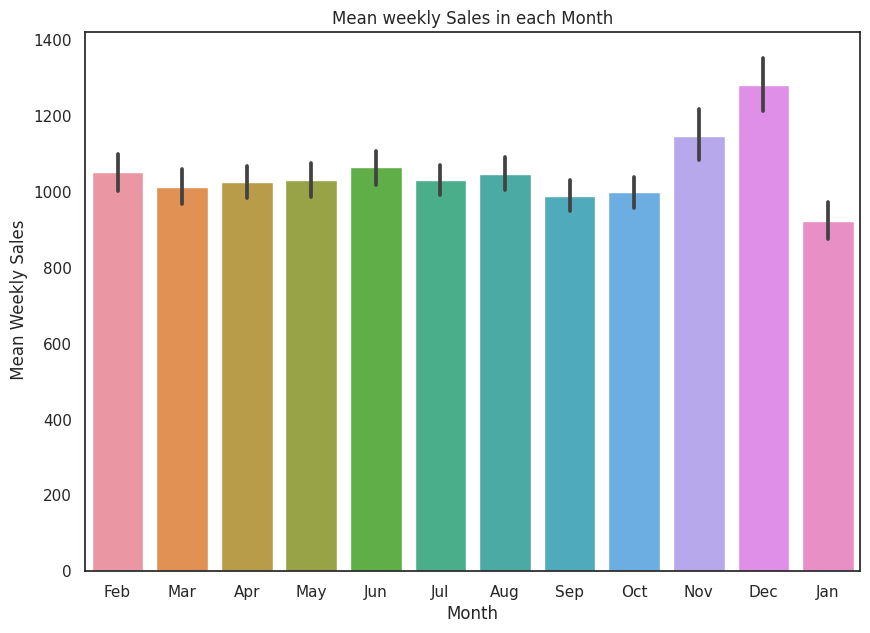

In [ ]:
plt.subplots(figsize=(10,7))
sns.barplot(x="Month", y="Weekly_Sales", data=data,orient='v')
plt.xlabel('Month')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean weekly Sales in each Month')
#plt.savefig('./images/Mean_Weekly_Sales_vs_Months.png')
plt.show()
# inference: Graph shows sales in each month and from this we can see December seems to have a very high sales
#            compared to every other month and January have the least sales.

Feature Engineering

Before creating and running model we will look through the columns and make meaningful columns and create dummies where needed.
We need to take special care (KNN Imputation) of Markdown5 which has many outlier and as we know Markdown1-5 which have a lot of missing values.

We will create dummies for "Store, Month, Year"

In [ ]:
# Create Week column which says which week of the month it is.
data["Week"]= round(np.floor(((data.Day-1)/7)+1))

# Create dummies for the columns that are required for later studies
Store_dummies = pd.get_dummies(data.Store, prefix='Store')
Month_dummies = pd.get_dummies(data.Month, prefix='Month')
Year_dummies = pd.get_dummies(data.Year, prefix='Year')
Week_dummies = pd.get_dummies(data.Week, prefix='Week')

# concatenate DataFrames (axis=0 for rows, axis=1 for columns)
data = pd.concat([data, Store_dummies,Month_dummies,Year_dummies,Week_dummies], axis=1)

In [ ]:
data_decision=data.iloc[:,:18]

data_decision["Week"]= round(np.floor(((data_decision.Day-1)/7)+1))

In [ ]:
# Drop the columns that we have created dummies
data.drop(['Type', 'Store','Month','Year','Day','Week'], axis=1, inplace=True)

In [ ]:
data

Date  Weekly_Sales    Size  Temperature  Fuel_Price  MarkDown1  \
0    2010-02-05    1643.69090  151315        42.31       2.572    -500.00   
1    2010-02-12    1641.95744  151315        38.51       2.548    -500.00   
2    2010-02-19    1611.96817  151315        39.93       2.514    -500.00   
3    2010-02-26    1409.72759  151315        46.63       2.561    -500.00   
4    2010-03-05    1554.80668  151315        46.50       2.625    -500.00   
...         ...           ...     ...          ...         ...        ...   
6430 2012-09-28     713.17395  118221        64.88       3.997    4556.61   
6431 2012-10-05     733.45507  118221        64.89       3.985    5046.74   
6432 2012-10-12     734.46436  118221        54.47       4.000    1956.28   
6433 2012-10-19     718.12553  118221        56.47       3.969    2004.02   
6434 2012-10-26     760.28143  118221        58.85       3.882    4018.91   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5  ...  Month_Oct  Month_Sep  \
0       -500.00    -500.00    -500.00    -500.00  ...          0          0   
1       -500.00    -500.00    -500.00    -500.00  ...          0          0   
2       -500.00    -500.00    -500.00    -500.00  ...          0          0   
3       -500.00    -500.00    -500.00    -500.00  ...          0          0   
4       -500.00    -500.00    -500.00    -500.00  ...          0          0   
...         ...        ...        ...        ...  ...        ...        ...   
6430      20.64       1.50    1601.01    3288.25  ...          0          1   
6431    -500.00      18.82    2253.43    2340.01  ...          1          0   
6432    -500.00       7.89     599.32    3990.54  ...          1          0   
6433    -500.00       3.18     437.73    1537.49  ...          1          0   
6434      58.08     100.00     211.94     858.33  ...          1          0   

      Year_2010  Year_2011  Year_2012  Week_1.0  Week_2.0  Week_3.0  Week_4.0  \
0             1          0          0         1         0         0         0   
1             1          0          0         0         1         0         0   
2             1          0          0         0         0         1         0   
3             1          0          0         0         0         0         1   
4             1          0          0         1         0         0         0   
...         ...        ...        ...       ...       ...       ...       ...   
6430          0          0          1         0         0         0         1   
6431          0          0          1         1         0         0         0   
6432          0          0          1         0         1         0         0   
6433          0          0          1         0         0         1         0   
6434          0          0          1         0         0         0         1   

      Week_5.0  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
6430         0  
6431         0  
6432         0  
6433         0  
6434         0  

[6435 rows x 81 columns]

In [ ]:
# drop each column from the list of dummies to make it perfect to use in models
data.drop(['Store_1','Month_Jan','Year_2010','Week_5.0'], axis=1, inplace=True)

KNN model imputation

In [ ]:
data.iloc[:,5:10].describe().T

# Inference: more than 50% is missing values with (-500) so imputing with KNN might not be a good idea.
# But what are the other methods? imputing with random values in the range of that particular columns?
# Lets try that first.

count         mean          std    min    25%    50%       75%  \
MarkDown1  6435.0  2106.175500  6008.334618 -500.0 -500.0 -500.0  2302.300   
MarkDown2  6435.0   446.067837  4946.234382 -500.0 -500.0 -500.0     0.090   
MarkDown3  6435.0    88.158396  5306.320800 -500.0 -500.0 -500.0     3.705   
MarkDown4  6435.0   661.551088  3853.055534 -500.0 -500.0 -500.0   314.320   
MarkDown5  6435.0  1260.128491  4227.342723 -500.0 -500.0 -500.0  1983.265   

                 max  
MarkDown1   88646.76  
MarkDown2  104519.54  
MarkDown3  141630.61  
MarkDown4   67474.85  
MarkDown5  108519.28

In [ ]:
data.MarkDown1=data.MarkDown1.map(lambda x: np.nan if x==-500 else x)
data.MarkDown2=data.MarkDown2.map(lambda x: np.nan if x==-500 else x)
data.MarkDown3=data.MarkDown3.map(lambda x: np.nan if x==-500 else x)
data.MarkDown4=data.MarkDown4.map(lambda x: np.nan if x==-500 else x)
data.MarkDown5=data.MarkDown5.map(lambda x: np.nan if x==-500 else x)

In [ ]:
missing_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

# Not including our actual y(Weekly Sales) and Size of store for Markdown since by including weekly sales
# It can be a bad method to use those MarkDown again for predicting weekly sales.

impute_cols = [c for c in data.columns if not c in ['Weekly_Sales','Date','Sqrt_Sales','lnSales']+missing_cols]

data_imputed=data.copy()

In [ ]:
def find_best_k_reg(X, y, k_min=1, k_max=51, step=2, cv=10):
    k_range = range(k_min, k_max+1, step)
    r2s = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv)
        r2s.append(np.mean(scores))
    print ("Best R2 value:",np.max(r2s),"\nBest k: ",np.argmax(k_range))
    return np.argmax(k_range)

In [ ]:
impute_missing = data.loc[data.MarkDown1.isnull(), :]
impute_valid = data.loc[~data.MarkDown1.isnull(), :]

y = impute_valid.MarkDown1.values
X = impute_valid[impute_cols]

Xs = ss.fit_transform(X)

Best R2 value: 0.16796384773805814 
Best k:  25


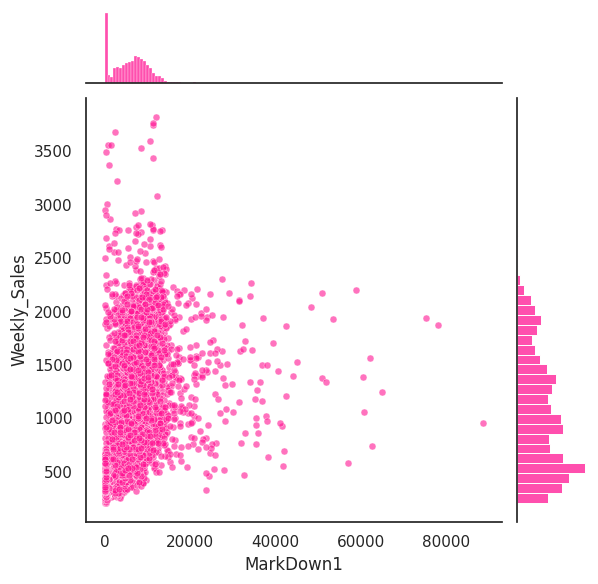

In [ ]:
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown1_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown1.isnull(), 'MarkDown1'] = MarkDown1_impute

#Lets look how the MarkDown1 vs Weekly_Sales appear
#sns.jointplot(data_imputed.MarkDown1, data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color='deeppink')
sns.jointplot(x=data_imputed.MarkDown1, y=data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color='deeppink')

plt.show()

Best R2 value: 0.41503402148479146 
Best k:  25


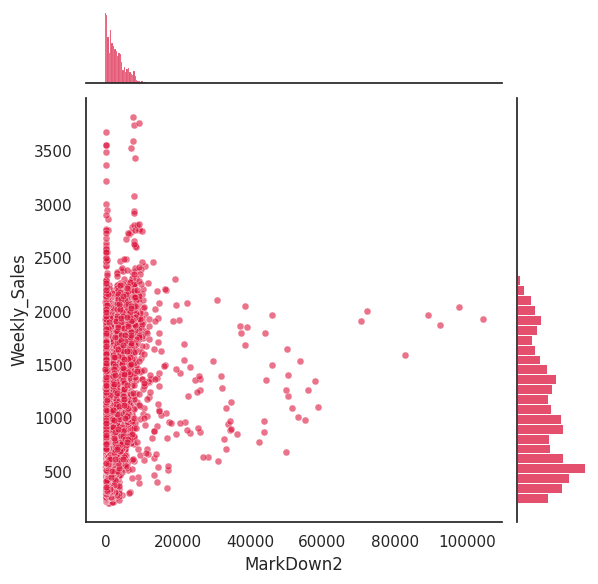

In [ ]:
impute_missing = data.loc[data.MarkDown2.isnull(), :]
impute_valid = data.loc[~data.MarkDown2.isnull(), :]

y = impute_valid.MarkDown2.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown2_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown2.isnull(), 'MarkDown2'] = MarkDown2_impute

#Lets look how the MarkDown1 vs Weekly_Sales appear
sns.jointplot(x=data_imputed.MarkDown2, y=data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'crimson')
plt.show()

Best R2 value: 0.345097253431437 
Best k:  25


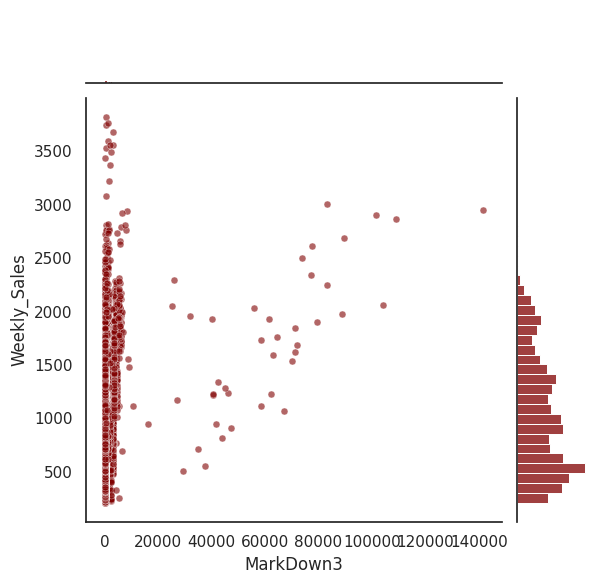

In [ ]:
impute_missing = data.loc[data.MarkDown3.isnull(), :]
impute_valid = data.loc[~data.MarkDown3.isnull(), :]

y = impute_valid.MarkDown3.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown3_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown3.isnull(), 'MarkDown3'] = MarkDown3_impute

sns.jointplot(x=data_imputed.MarkDown3, y=data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color= 'maroon')
plt.show()

Best R2 value: 0.3470822603116795 
Best k:  25


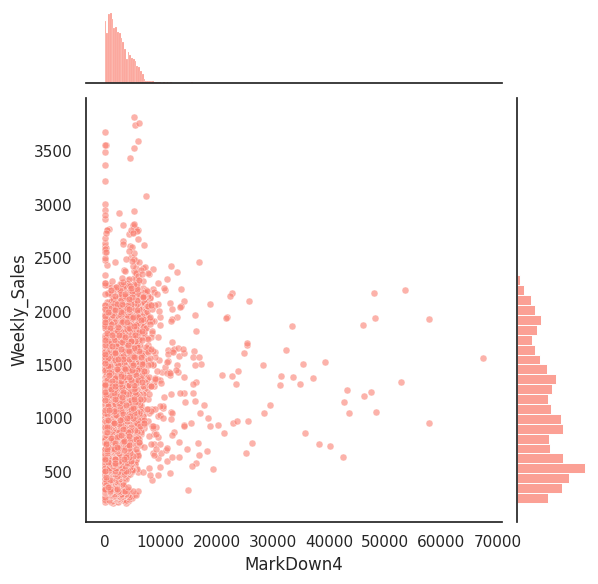

In [ ]:
impute_missing = data.loc[data.MarkDown4.isnull(), :]
impute_valid = data.loc[~data.MarkDown4.isnull(), :]

y = impute_valid.MarkDown4.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown4_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown4.isnull(), 'MarkDown4'] = MarkDown4_impute

sns.jointplot(x=data_imputed.MarkDown4, y=data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'salmon')
plt.show()

Best R2 value: 0.09745142632181154 
Best k:  25


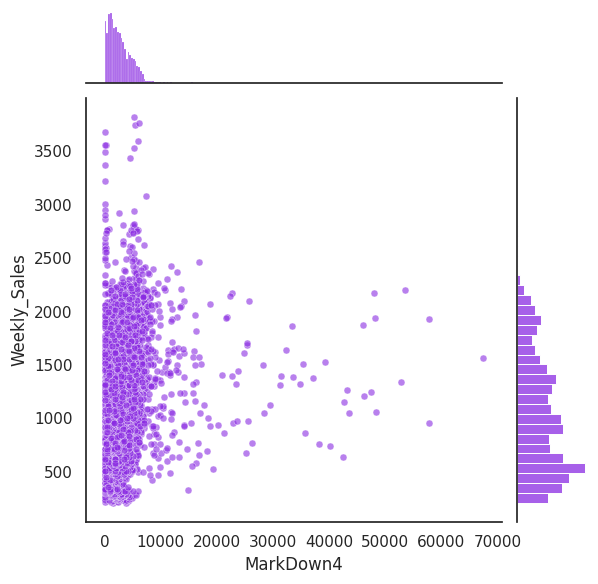

In [ ]:
impute_missing = data.loc[data.MarkDown5.isnull(), :]
impute_valid = data.loc[~data.MarkDown5.isnull(), :]

y = impute_valid.MarkDown5.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown5_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown5.isnull(), 'MarkDown5'] = MarkDown5_impute

sns.jointplot(x=data_imputed.MarkDown4, y = data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'blueviolet')
plt.show()

In [ ]:

walmart_data=data_imputed.copy()

# The accuracy and R2 are very bad. This means that we likely imputing crap with these models.
# This doesn't necessarily mean that imputation is a bad idea, but we may want to consider
# using a different method.

Modelling

0.9413727175905215
0.9455659713125104
Adjusted R^2 0.940681249406733
Cross-validated scores: [0.95226193 0.94151235 0.94791119 0.94405642 0.94266989 0.9246275
 0.94468447 0.9470372  0.95748691 0.93103007]
Mean Cross validation 0.943327792997265


Text(0.5, 1.0, 'Predicted vs Actual Sales')

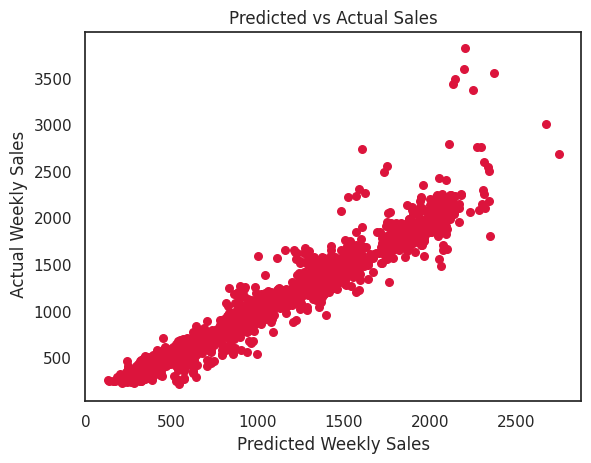

In [ ]:
predictors=[col for col in data_imputed.columns if col not in ['Date','Weekly_Sales']]
X=data_imputed[predictors]
y=data_imputed.Weekly_Sales.values

Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
r2=mlr.score(X_test, y_test)
print(mlr.score(X_test, y_test))
print(mlr.score(X_train, y_train))
adj_r2 = 1 - (len(y)-1)/(len(y)-X.shape[1]-1)*(1-r2)
print("Adjusted R^2",adj_r2)


# Perform 10-fold cross validation
scores = cross_val_score(mlr, X_train, y_train, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(mlr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, c='crimson', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')


0.9424508777588686
0.9392155838552612
Cross-validated scores: [ 7.04701807e-01 -7.96033618e+11 -9.40960244e+12 -9.32924393e+12
 -1.87345862e+13 -9.91749304e+11 -6.55114573e+13 -3.84323411e+14
 -2.05683754e+12 -8.91927095e+12]
Mean Cross validation -50007219210534.29


Text(0.5, 1.0, 'Predicted vs Actual Sales')

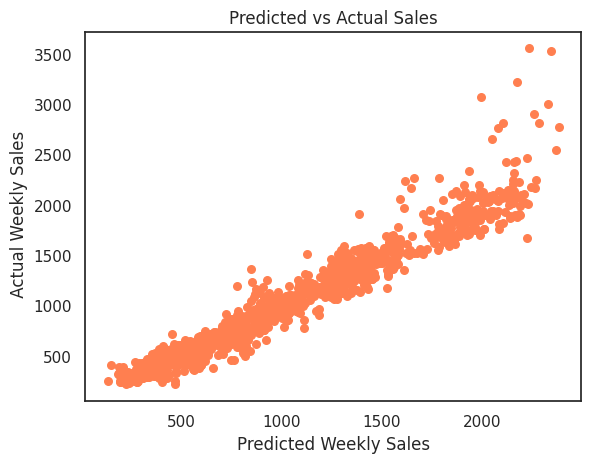

In [ ]:
predictors=[col for col in data.columns if col not in ['Date','Weekly_Sales']]
predictors=[col for col in predictors if 'MarkDown' not in col]
X=data[predictors]
y=data.Weekly_Sales.values
Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))


# Perform 10-fold cross validation
scores = cross_val_score(lr, X, y, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(lr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, color = 'coral', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')

In [ ]:
data=data_imputed.copy()

In [ ]:
# Setting the offset to finalize the test data.
offset = timedelta(days=90)
split_date=data.Date.max()-offset

In [ ]:
data_train=data[data.Date < split_date]
data_test=data[data.Date > split_date]

In [ ]:
data_train = data_train.reindex(np.random.permutation(data_imputed.index))## Identify outliers

In [ ]:
data_train.columns

Index(['Date', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type_A', 'Type_B', 'Type_C', 'Store_2',
       'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
       'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20',
       'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32',
       'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38',
       'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44',
       'Store_45', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'Year_2011', 'Year_2012', 'Week_1.0',
       'Week_2.0

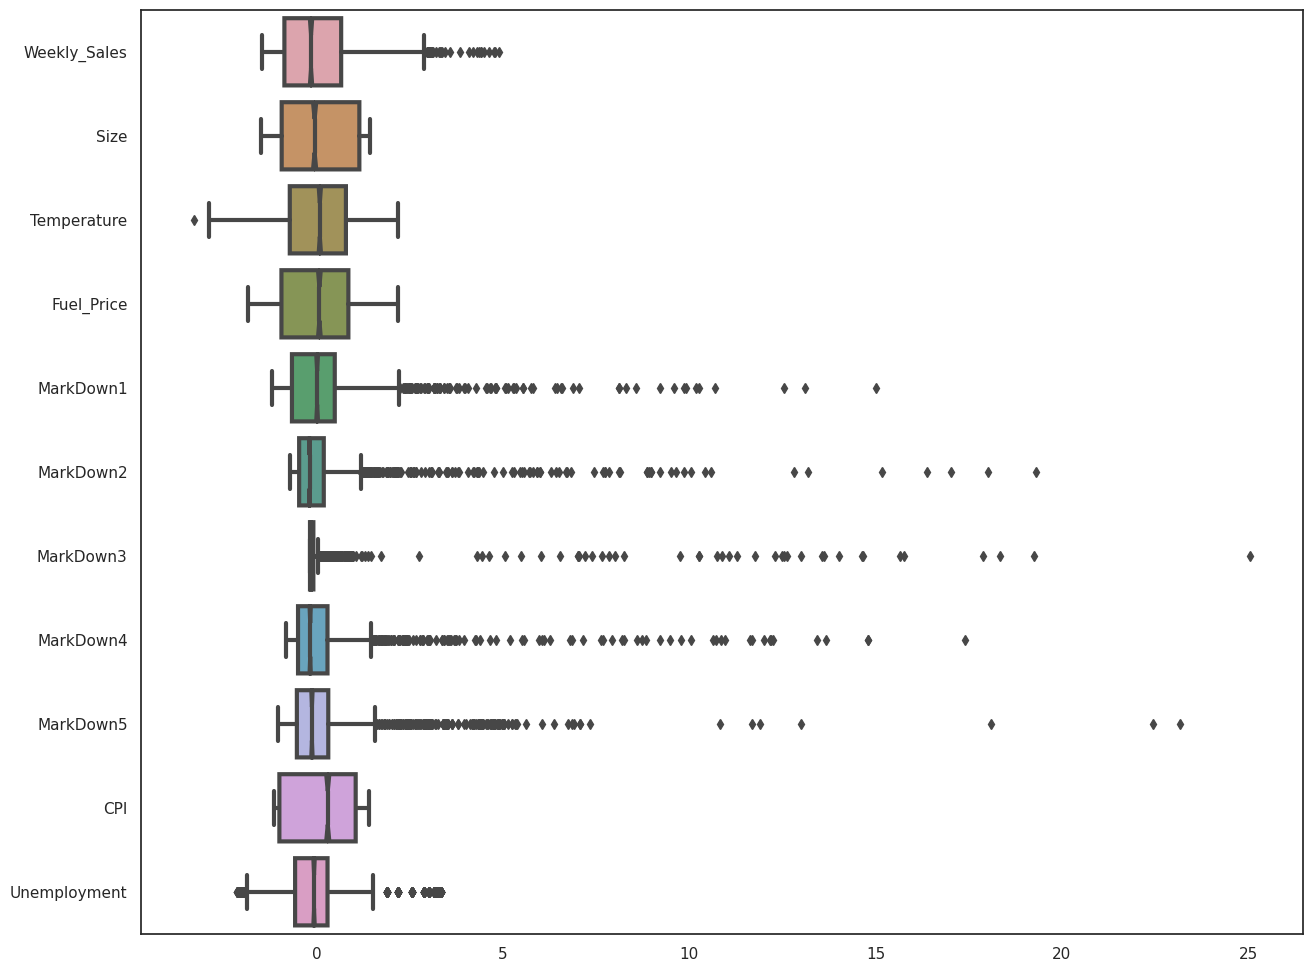

In [ ]:
data_box=data_train.iloc[:, 1:12]
data_norm = (data_box - data_box.mean()) / data_box.std()

fig = plt.figure(figsize=(15, 12))
ax = fig.gca()

ax = sns.boxplot(data=data_norm, orient='h', fliersize=5,
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

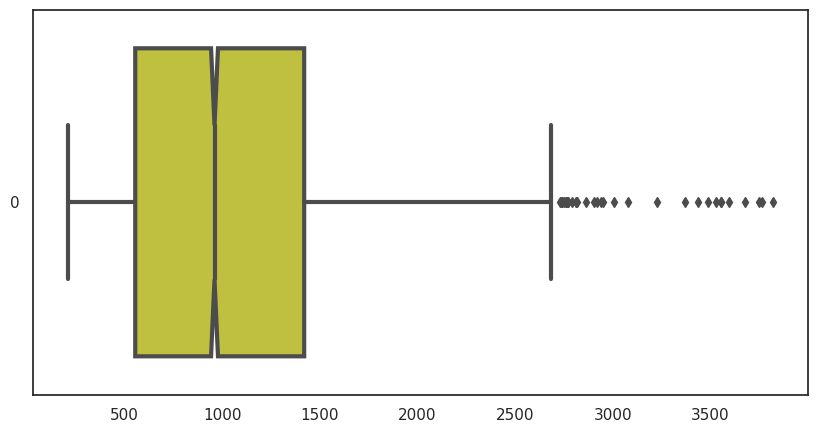

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

ax = sns.boxplot(data_train.Weekly_Sales, orient='h', fliersize=5,
                 linewidth=3, notch=True, saturation=0.5, ax=ax, color = 'yellow')
plt.show()

In [ ]:
# Lets consider 3,000,000 as upper limit
data_train[data_train.Weekly_Sales>3000].shape

(14, 77)

In [ ]:
# there is only 14 outliers. Lets drop it and proceed.
data_train=data_train[data_train.Weekly_Sales<3000]

Improve and Evaluate Model

Feature Selection

In [ ]:
predictors=[col for col in data.columns if col not in ['Weekly_Sales','Sqrt_Sales','lnSales','Date']] # Date

predictors=[col for col in predictors if 'Month' not in col]
predictors=[col for col in predictors if 'Week' not in col]
predictors=[col for col in predictors if 'Year' not in col]


Test-Train Split such that Test data is last 90 days data (future 3 months prediction)

In [ ]:
X_train = data_train[predictors]
y_train = data_train.Weekly_Sales.values

X_test = data_test[predictors]
y_test = data_test.Weekly_Sales.values

In [ ]:
X_train_s=ss.fit_transform(X_train)
X_test_s=ss.fit_transform(X_test)

LGBM Regressor

LightGBM is a relatively new algorithm. It is a gradient boosting framework that uses tree based learning algorithm.

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise.

It chooses the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm. Light GBM is prefixed as ‘Light’ because of its high speed.

Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

In [ ]:
lgbm_features = lgb.LGBMRegressor()

In [ ]:
lgbm_features.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2428
[LightGBM] [Info] Number of data points in the train set: 5836, number of used features: 58
[LightGBM] [Info] Start training from score 1042.925827


LGBMRegressor()

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_features.feature_importances_
}).sort_values('importance', ascending=False)

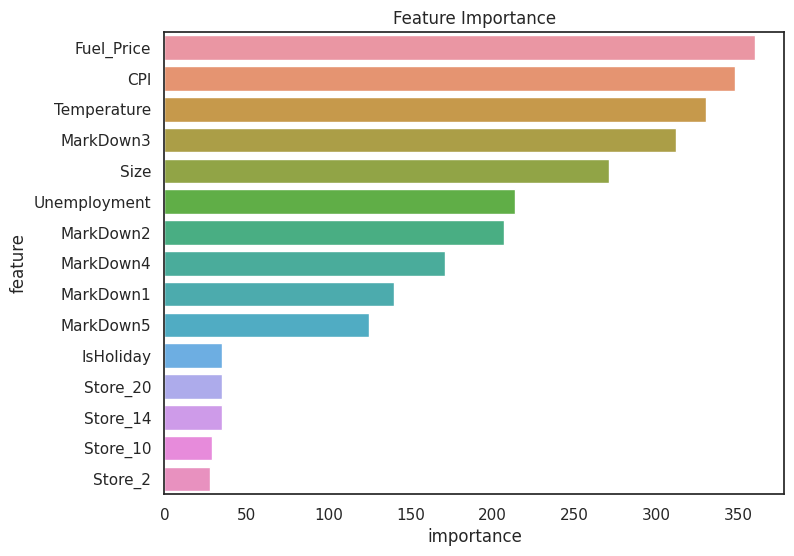

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

Clearly we have the top features listed above.
Top five :

Fuel_Price
CPI
Markdown3
Temperature
Size

Lasso Feature Selection

Test- Train Split such that Test data is last 90 days data (Like a furture 3 months prediction)

LASSO is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.
The basic idea is to penalize the model coefficients such that they don’t grow too big and overfit the data. Using LASSO regression, we are essentially eliminating the higher-order terms in the more complex models.

So, LASSO regression is similar to Linear Regression, but with a penalization coefficient at the end of the formula, eliminating the least important terms.

Here, we want to evaluate the best model complexity (order of polynomial degree) for our LASSO regression model. Do we need linear regression with 7th degree order terms to reach the best accuracy, or is 2nd degree enough? Let's see.



In [ ]:
lasso_cv = LassoCV(n_alphas=1000,max_iter=2000, cv=10, verbose=1)
lasso_cv.fit(X_train_s, y_train)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(cv=10, max_iter=2000, n_alphas=1000, verbose=1)

In [ ]:
# Put the features and coefs into a dataframe
# sort by magnitude
lasso_feat = pd.DataFrame(dict(feature=X_train.columns, coef=lasso_cv.coef_, abscoef=np.abs(lasso_cv.coef_)))
lasso_feat.sort_values('abscoef', inplace=True, ascending=False)
# main_features
lasso_feat[lasso_feat.coef != 0.]

feature        coef     abscoef
0           Size  346.613521  346.613521
11        Type_A  173.433016  173.433016
22      Store_10  132.116175  132.116175
20       Store_8  -98.373169   98.373169
52      Store_40  -92.817522   92.817522
44      Store_32  -89.574566   89.574566
45      Store_33  -85.507318   85.507318
53      Store_41  -77.109841   77.109841
21       Store_9  -76.953422   76.953422
46      Store_34  -75.346713   75.346713
38      Store_26  -74.340352   74.340352
48      Store_36  -74.322937   74.322937
23      Store_11  -69.260499   69.260499
36      Store_24  -59.761223   59.761223
43      Store_31  -58.884830   58.884830
27      Store_15  -53.549700   53.549700
35      Store_23   52.393572   52.393572
37      Store_25  -49.713938   49.713938
33      Store_21  -49.426333   49.426333
31      Store_19  -48.339579   48.339579
9   Unemployment  -46.946272   46.946272
40      Store_28  -46.281526   46.281526
26      Store_14   40.419903   40.419903
32      Store_20   39.557416   39.557416
5      MarkDown3   38.996842   38.996842
51      Store_39  -38.676781   38.676781
56      Store_44  -37.794267   37.794267
18       Store_6  -36.080007   36.080007
17       Store_5  -35.195109   35.195109
41      Store_29  -34.847644   34.847644
24      Store_12   34.060442   34.060442
16       Store_4   32.733838   32.733838
28      Store_16  -24.684117   24.684117
57      Store_45  -23.122586   23.122586
15       Store_3  -21.295655   21.295655
55      Store_43   20.364614   20.364614
19       Store_7  -20.312101   20.312101
30      Store_18   19.842501   19.842501
42      Store_30  -18.149986   18.149986
14       Store_2   17.036661   17.036661
4      MarkDown2  -13.563862   13.563862
25      Store_13   11.434266   11.434266
1    Temperature  -11.404205   11.404205
2     Fuel_Price  -10.273304   10.273304
10     IsHoliday    9.954509    9.954509
34      Store_22    9.688052    9.688052
47      Store_35    8.379549    8.379549
8            CPI    8.223754    8.223754
54      Store_42    7.959498    7.959498
7      MarkDown5    4.840999    4.840999
49      Store_37   -2.683037    2.683037
29      Store_17    2.066605    2.066605
6      MarkDown4   -1.811418    1.811418

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_features.feature_importances_
}).sort_values('importance', ascending=False)

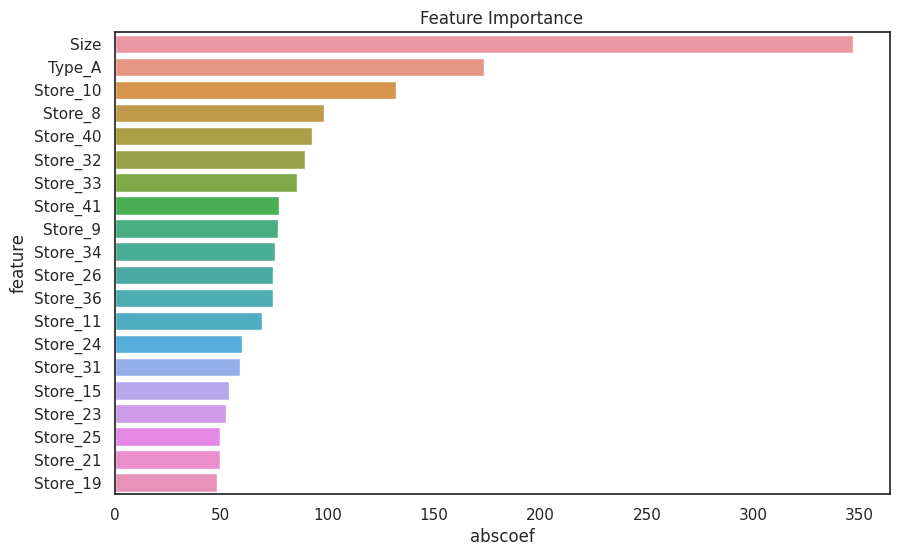

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=lasso_feat.head(20), x='abscoef', y='feature');

In [ ]:
actual_predictors=lasso_feat[lasso_feat.coef != 0.].feature.values

In [ ]:
# Lets see the best alpha score
lasso_cv.alpha_

#best alpha value is 0.45384197291954748 which could be used later to run model

0.4538419729195478

In [ ]:
# We will assign the best alpha score and according to that we will train and test our model
best_lasso = Lasso(alpha=lasso_cv.alpha_)
best_lasso.fit(X_train_s, y_train)

Lasso(alpha=0.4538419729195478)

In [ ]:
lasso_scores = cross_val_score(best_lasso, X_train_s, y_train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[0.93310163 0.94634803 0.92798316 0.94437124 0.92333842 0.93320433
 0.93885965 0.94107801 0.92885889 0.92073068]
0.9337874041646215


In [ ]:
lasso_yhat=best_lasso.predict(X_test_s)
lasso_score=best_lasso.score(X_test_s, y_test)
print("R2: ",lasso_score)
lasso_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-lasso_score)
print("Adjusted R2: ",lasso_adj_r2)

R2:  0.9602226461883259
Adjusted R2:  0.9558365501406507


In [ ]:
# converting the residuals into the actual dimenssion

train_resids = y_train*1000 - best_lasso.predict(X_train_s)*1000
test_resids = y_test*1000 - lasso_yhat*1000
lasso_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",lasso_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())
# The Residual looks quite big. But this can be because our base values ( Weekly Sales) are quite big
# and in terms of millions

Train Residual 500857251.6762471
Test Residual 39753765.72421485
Residual ratio of Test to Train 0.07937144883331267


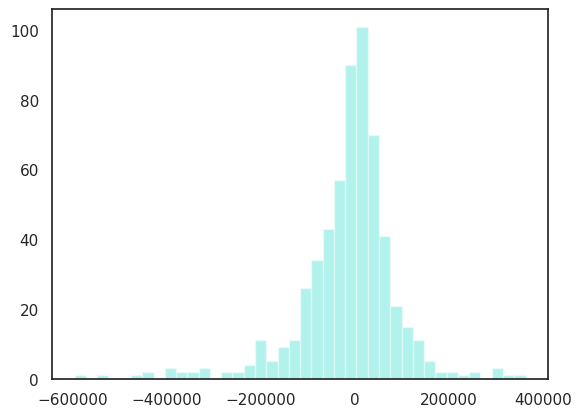

In [ ]:
sns.distplot(test_resids, kde=False, bins=40, color = 'turquoise')
plt.show()

# The residuals looks ok and almost like a normal distribution


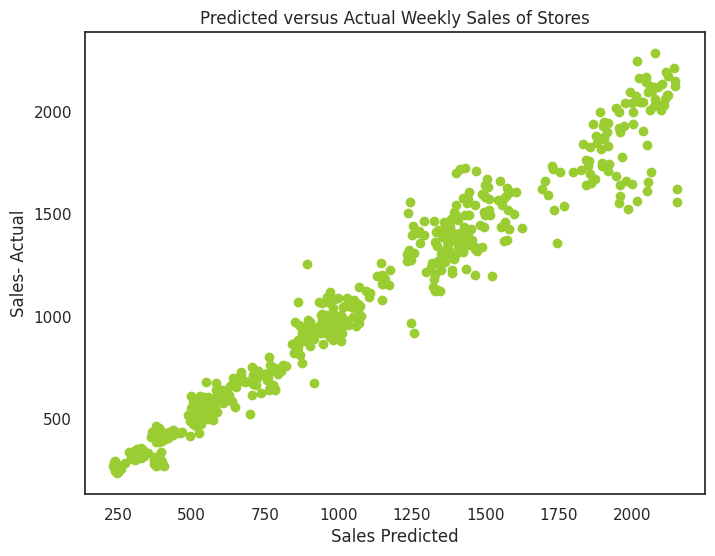

In [ ]:
fig = plt.subplots(figsize=(8,6))
plt.scatter(lasso_yhat,y_test, c='yellowgreen')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')
#plt.savefig('./images/Actual_vs_Predicted_Sales.png')
plt.show()

In [ ]:
X_train = X_train[actual_predictors]
X_test = X_test[actual_predictors]

X_train_s=ss.fit_transform(X_train)
X_test_s=ss.fit_transform(X_test)

Final Model selection & Implementation

Random Forest Regressor

In [ ]:
rfr=RandomForestRegressor(n_estimators=100, max_depth=None, max_features='auto')

In [ ]:
# Fit and crossvalidate on train data
rfr.fit(X_train_s, y_train)
rfr_scores = cross_val_score(rfr, X_train_s, y_train, cv=10)
np.mean(rfr_scores)

0.9508255890590469

In [ ]:
rfr_yhat = rfr.predict(X_test_s)
rfr_score=rfr.score(X_test_s, y_test)

print("R2: ",rfr_score)
rfr_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-rfr_score)
print("Adjusted R2: ",rfr_adj_r2)

R2:  0.7920206905665734
Adjusted R2:  0.7712619271014668


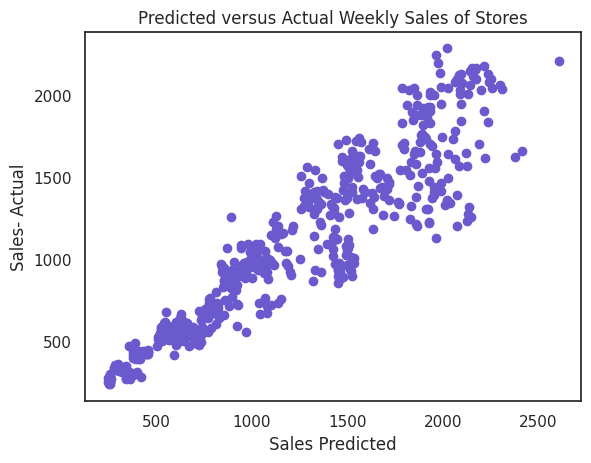

In [ ]:
plt.scatter(rfr_yhat, y_test, color='slateblue')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')
plt.show()

In [ ]:
train_resids = y_train*1000 - rfr.predict(X_train_s)*1000
test_resids = y_test*1000 - rfr_yhat*1000
rfr_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",rfr_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 149735106.6900999
Test Residual 91543011.91089997
Residual ratio of Test to Train 0.6113663918533312


GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100,max_depth=10,learning_rate=0.1)

In [ ]:
gb.fit(X_train_s, y_train)
gb_scores = cross_val_score(gb, X_train_s, y_train, cv=6)
np.mean(gb_scores)

0.9523064268777032

In [ ]:
gb_yhat=gb.predict(X_test_s)
gb_score=gb.score(X_test_s,y_test)

print("R2: ",gb_score)
gb_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-gb_score)
print("Adjusted R2: ",gb_adj_r2)

R2:  0.7670986518012248
Adjusted R2:  0.7438523778755467


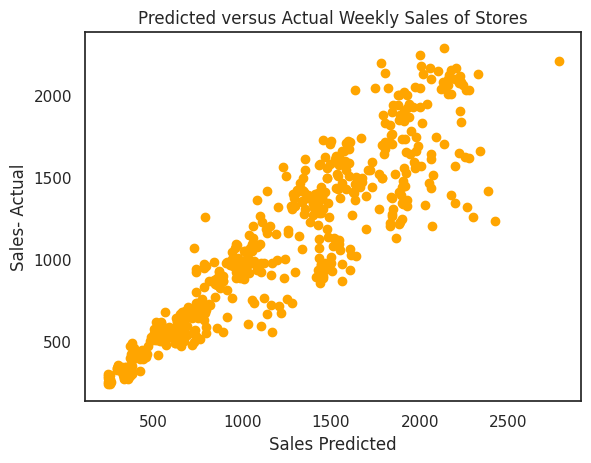

In [ ]:
plt.scatter(gb_yhat, y_test, c='orange')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')

plt.show()


In [ ]:
train_resids = y_train*1000 - gb.predict(X_train_s)*1000
test_resids = y_test*1000 - gb_yhat*1000
gb_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",gb_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 71167298.1964078
Test Residual 95345991.38430803
Residual ratio of Test to Train 1.3397444303867174


Support Vector Regression

In [ ]:
svr=SVR(C=50000.0, max_iter=500)

svr.fit(X_train_s, y_train)

SVR(C=50000.0, max_iter=500)

In [ ]:
svr_scores = cross_val_score(svr, X_train_s, y_train, cv=10)
np.mean(svr_scores)

0.5347078710900492

In [ ]:
svr_yhat=svr.predict(X_test_s)
svr_score=svr.score(X_test_s,y_test)
print("R2: ",svr_score)
svr_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-svr_score)
print("Adjusted R2: ",svr_adj_r2)

R2:  0.2900225459358352
Adjusted R2:  0.2191585062646474


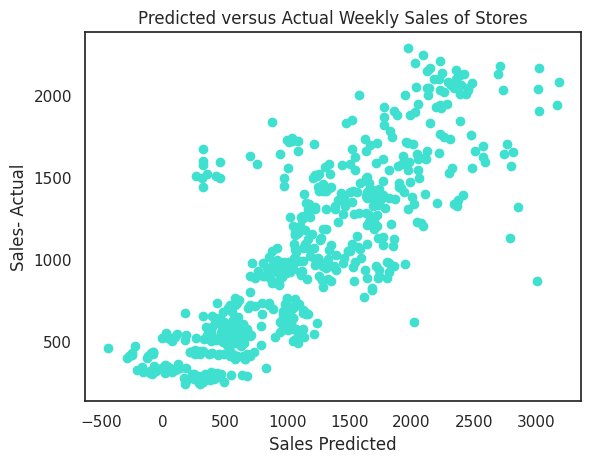

In [ ]:
plt.scatter(svr_yhat, y_test, c='turquoise')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')

plt.show()

In [ ]:
train_resids = y_train*1000 - rfr.predict(X_train_s)*1000
test_resids = y_test*1000 - svr_yhat*1000
svr_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual", np.abs(train_resids).sum())
print("Test Residual",svr_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 149735106.6900999
Test Residual 191890620.19766223
Residual ratio of Test to Train 1.2815339330863118


In [ ]:
Residual_graph=pd.DataFrame()
Residual_graph["Store"]=range(1,46)
Residual_graph['actual_y']=0
Residual_graph['predicted_lasso_y']=0

count=0
for x in y_test:
    count+=1
    Residual_graph['actual_y'][count%45]+=x

count=0
for x in lasso_yhat:
    count+=1
    Residual_graph['predicted_lasso_y'][count%45]+=x

Residual_graph["actual_y"]=Residual_graph["actual_y"]/13
Residual_graph["predicted_lasso_y"]=Residual_graph["predicted_lasso_y"]/13

Residual_graph["Residual_lasso"]=np.abs(Residual_graph["actual_y"] - Residual_graph["predicted_lasso_y"])
Residual_graph["Residual_lasso_percentage"]=(Residual_graph["Residual_lasso"]/Residual_graph["actual_y"])*100

In [ ]:
# Setting the size of bubble according to the percentage change in prediction
s=Residual_graph.Residual_lasso_percentage.values
s=s*100

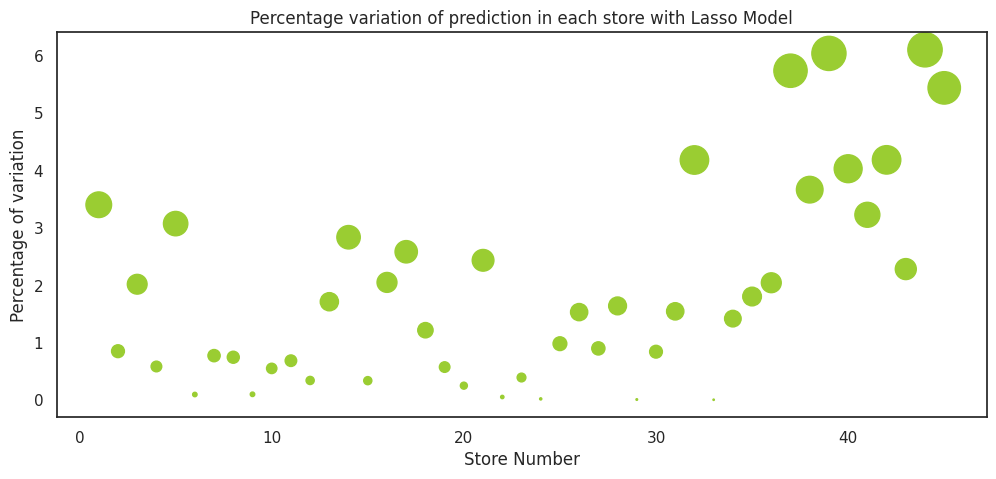

In [ ]:
fig = plt.subplots(figsize=(12,5))
plt.scatter(Residual_graph.Store, Residual_graph.Residual_lasso_percentage, s=s, color = 'yellowgreen')
plt.xlabel('Store Number')
plt.ylabel('Percentage of variation')
plt.title('Percentage variation of prediction in each store with Lasso Model')
#plt.savefig('./images/percentage_prediction_variation.png')
plt.show()

In [ ]:
# Create a dataframe to compare different models
Score=pd.DataFrame()
Score["Model_Name"]=('Lasso','RandomForest','GradientBoosting','SupportVector')
Score["Test_Score"]=(lasso_score,rfr_score,gb_score,svr_score)
Score["Adj_R2"]=(lasso_adj_r2,rfr_adj_r2,gb_adj_r2,svr_adj_r2)
Score["Test_Residual"]=(lasso_residue,rfr_residue,gb_residue,svr_residue)

Insights & Conclusion

Interpret findings and relate to goals/criteria

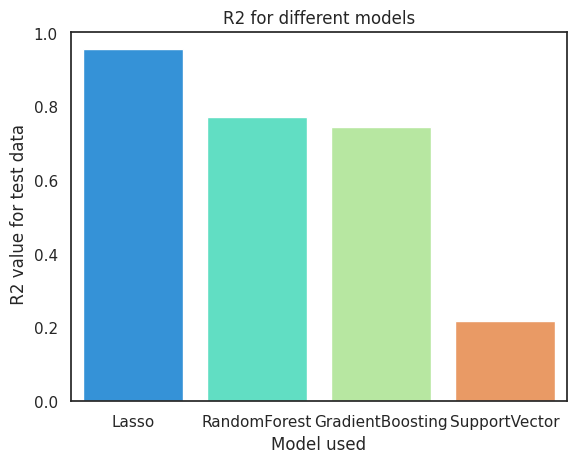

In [ ]:
# Checking how the Type of the store have effect on the sales.
sns.barplot(x="Model_Name", y="Adj_R2", data=Score,orient='v', palette='rainbow')
plt.xlabel('Model used')
plt.ylabel(' R2 value for test data')
plt.title('R2 for different models')
#plt.savefig('./images/R2_for_different_models.png')
plt.show()

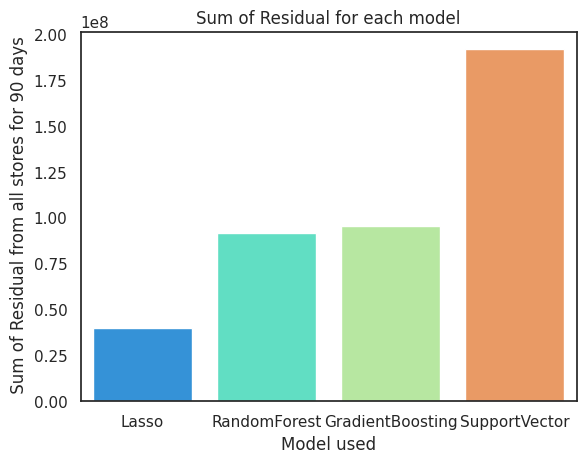

In [ ]:
sns.barplot(x="Model_Name", y="Test_Residual", data=Score,orient='v', palette='rainbow')
plt.xlabel('Model used')
plt.ylabel(' Sum of Residual from all stores for 90 days')
plt.title('Sum of Residual for each model')
#plt.savefig('./images/Residual_for_different_models.png')
plt.show()